In [1]:
#run at start of notebook, with fresh kernel
import os
default_path = os.getcwd()
print(default_path)

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis


# NBody Analysis

In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingNBody" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
num_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    num_s.append(Num_stars)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 


/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingNBody
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingNBody/500ParticlesOnly_Snapshots


ValueError: not enough values to unpack (expected 8, got 7)

In [ ]:
Analysis.pars_track(params,num_s)

In [ ]:
import numpy as np

p0 = []
p1 = []
p2 = []
p3 = []
for p in params:
    if len(p) >= 1: 
        p0.append(p[0])
        if len(p)>= 2:
            p1.append(p[1])
            if len(p)>= 3:
                p2.append(p[2])
                if len(p)>= 4:
                    p3.append(p[3])
                else:
                    p3.append(None)
            else:
                p2.append(None)
        else:
            p1.append(None)
    else:
        p0.append(None)

array1 = [[n,p] for n,p in zip(num_s,p0)]
array2 = [[n,p] for n,p in zip(num_s,p1)]
array3 = [[n,p] for n,p in zip(num_s,p2)]
array4 = [[n,p] for n,p in zip(num_s,p3)]
array1.sort()
array2.sort()
array3.sort()
array4.sort()
array1 = np.array(array1)
array2 = np.array(array2)
array3 = np.array(array3)
array4 = np.array(array4)

print(array1)
print(array2)
print(array3)
print(array4)

fig,ax = plt.subplots(1,4, figsize = (15,5))

ax[0].plot(array1[1:,0],array1[1:,1],"o--",color = "red")
ax[0].set_title("$a_0$")
ax[1].plot(array2[1:,0],array2[1:,1],"o--",color = "blue")
ax[1].set_title("$a_1$")
ax[2].plot(array3[1:,0],array3[1:,1],"o--",color = "green")
ax[2].set_title("$a_2$")
ax[3].plot(array4[1:,0],array4[1:,1],"o--",color = "orange")
ax[3].set_title("$a_3$")

plt.show()


In [ ]:
import numpy as np

array1 = [[n,z] for n,z in zip(num_s,z_rms_s)]
array2 = [[n,v] for n,v in zip(num_s,v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig,ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Number of Particles")

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Number of Particles")
plt.show()

# FDM Analysis

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFDM" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)

    print(os.getcwd()) 


In [ ]:
import numpy as np

array1 = [[r,z] for r,z in zip(r_s,FDM_z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,FDM_v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
plt.show()

# 50/50 FDM/NBody Analysis

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFull" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
folders  = ["FDM0.5_r0.014584958984941289_Snapshots","FDM0.5_r0.007292479492470644_Snapshots","FDM0.5_r0.003646239746235322_Snapshots","FDM0.5_r0.0007292479492470644_Snapshots"]
r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms, v_rms, popt = Analysis.analysis(folder)
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

In [ ]:
Analysis.pars_track(params,r_s)

In [ ]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingFull" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms, v_rms = Analysis.analysis(folder,type='Periodic')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

In [ ]:
import numpy as np

print("------------------------")
print("FDM")
array1 = [[r,z] for r,z in zip(r_s,FDM_z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,FDM_v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")
ax[0].set_ylim(0,1)

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
ax[1].set_ylim(0,2)
plt.show()

print("---------------------")
print("PARTICLES")
array1 = [[r,z] for r,z in zip(r_s,z_rms_s)]
array2 = [[r,v] for r,v in zip(r_s,v_rms_s)]
array1.sort()
array2.sort()

array1 = np.array(array1)
array2 = np.array(array2)
print(array1)
print(array2)

fig, ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(array1[:,0],array1[:,1],"o--")
ax[0].set_ylabel("$z_{rms}$")
ax[0].set_xlabel("Fuzziness $r$")
ax[0].set_ylim(0,1)

ax[1].plot(array2[:,0],array2[:,1],"o--")
ax[1].set_ylabel("$v_{rms}$")
ax[1].set_xlabel("Fuzziness $r$")
ax[1].set_ylim(0,2)
plt.show()




# Isolated N-Body Analysis

In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/NBody" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["5ParticlesOnly_Snapshots","1000ParticlesOnly_Snapshots","10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots","100000ParticlesOnly_Snapshots"]
folders = ["50000ParticlesOnly_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/NBody
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/NBody/50000ParticlesOnly_Snapshots
[['Time Elapsed:' '33893.07166838646']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass:' '2e-05']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]


ValueError: not enough values to unpack (expected 6, got 2)

#### Equilibrium ICs

##### NBody Pure

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Pure
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Pure/50000ParticlesOnly_Snapshots
[['Time Elapsed:' '1419.7230441570282']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '9.327153662103973e-06']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '9.327153662103973e-06']
 ['sigma2' '0']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]
r=0.5,Num_stars = 50000.0


/home/boris/Documents/Research/FDM_n_Bodies/OneD/FDM.py:125: RuntimeWarning: invalid value encountered in true_divide
  F_s = F_s/Norm_const


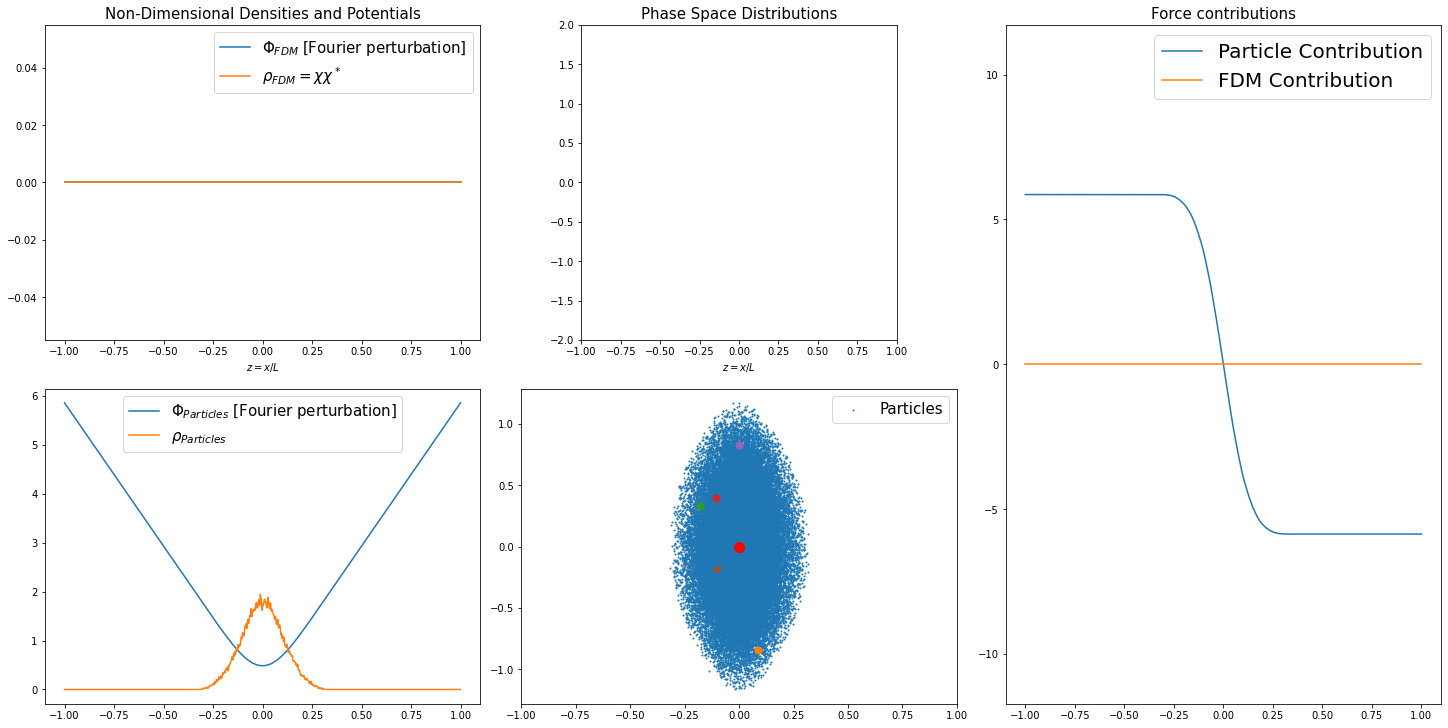

v_rms = 0.41389688485288517
z_rms = 0.10326136815289036
K_avg = 0.5*m*v_rms^2 = 7.989202910012356e-07 (m=9.327153662103973e-06)
=> 2*K_avg = 1.5978405820024712e-06
W_avg = 5163.068407644518
---------Now Different Routine---------
K_tot = 0.03994601455006199
K_avg = 7.989202910012399e-07
W_tot = -0.22631667275724987
W_avg = -4.526333455144998e-06


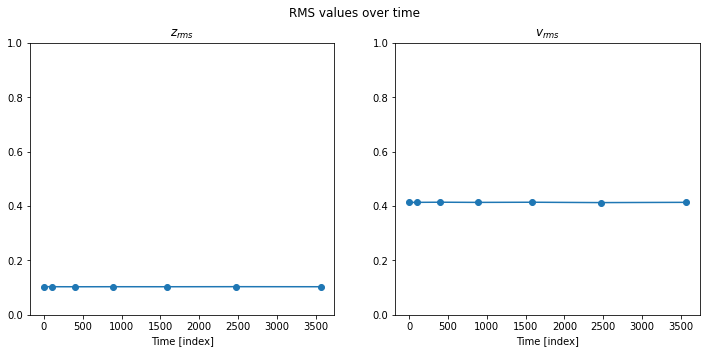

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:108: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


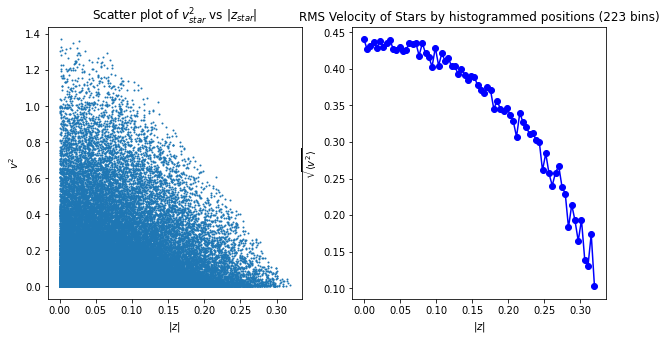

['False', 0.0, 9.327153662103973e-06, 0.0]


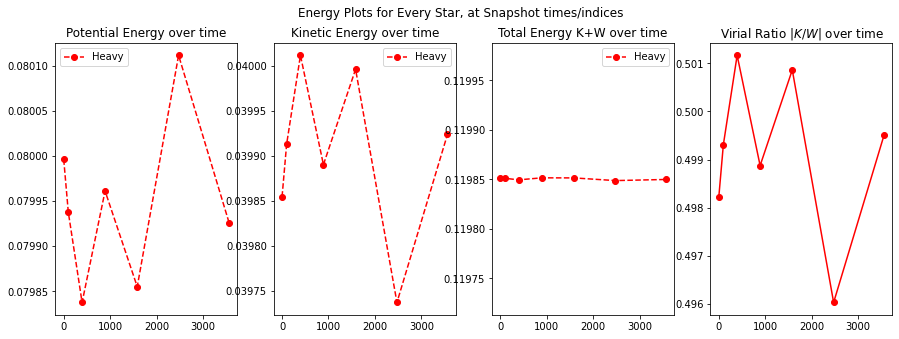

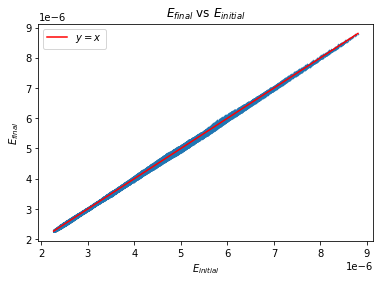

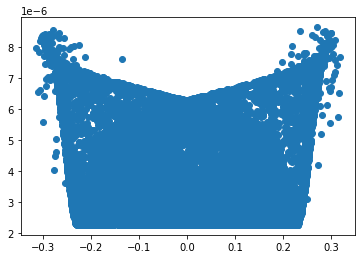

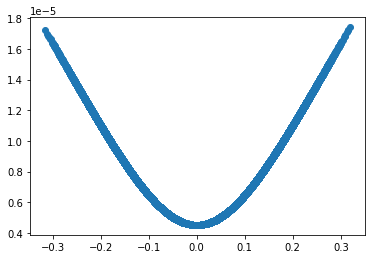

Total Potential: 0.3196198055258825
Total Potential: -0.159809902762945
223


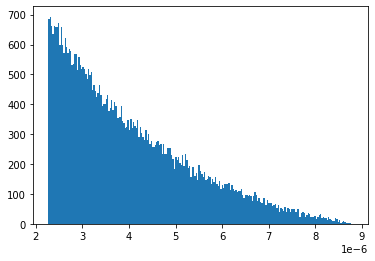

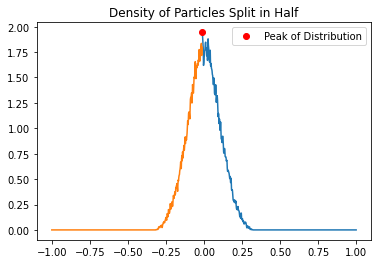

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:312: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_whole),np.log(rho_whole))


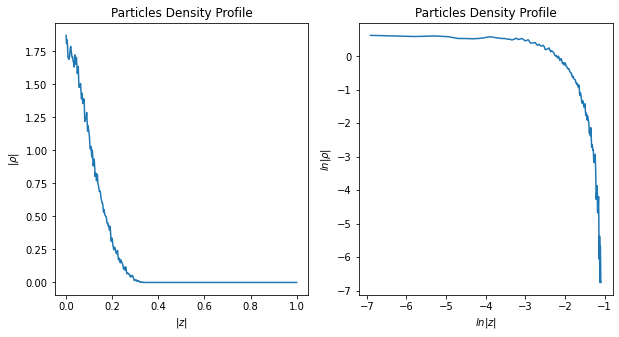

Check
Check
Check
#columns = 3
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


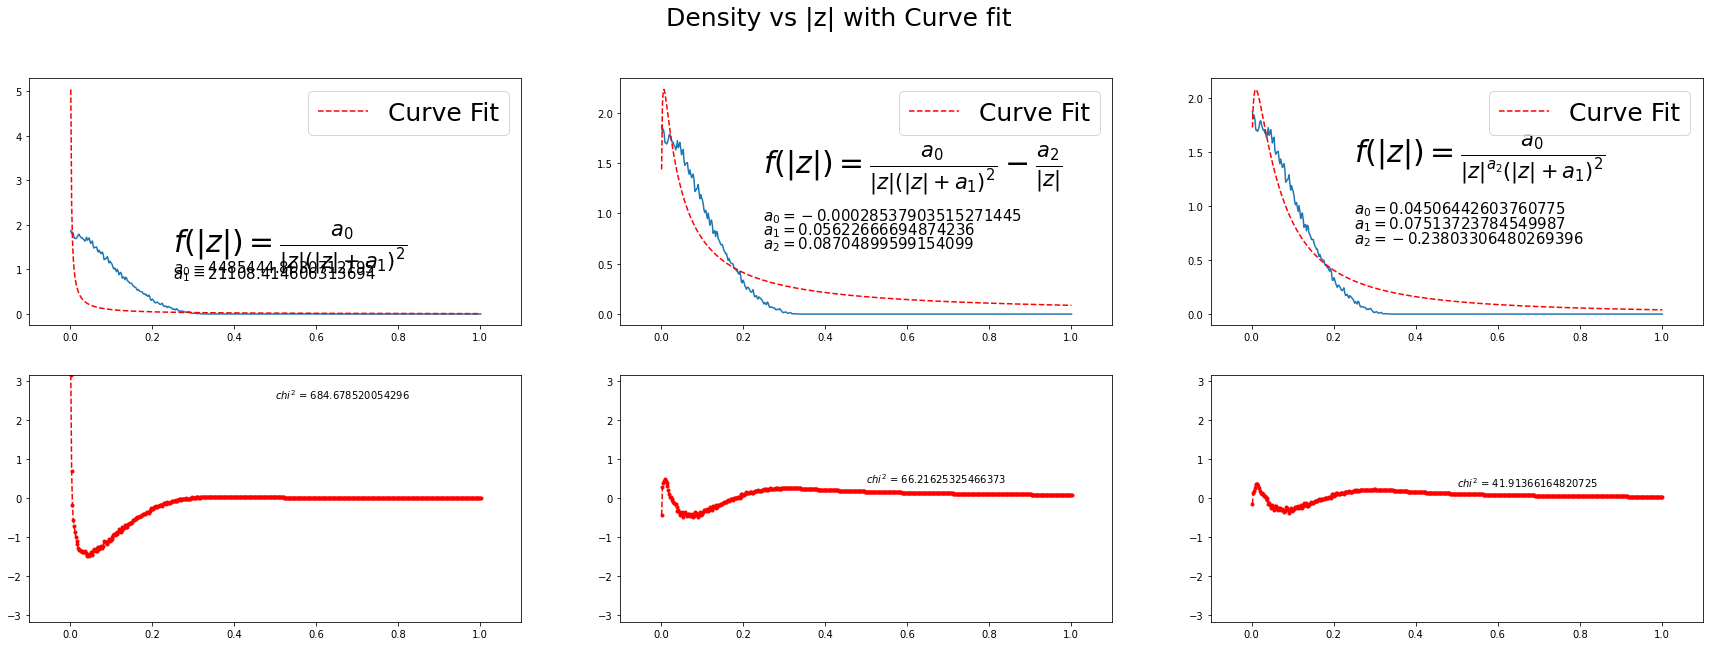

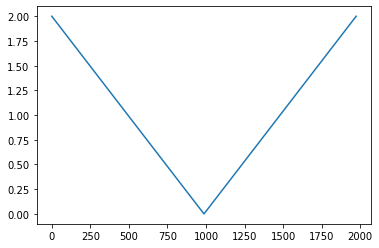

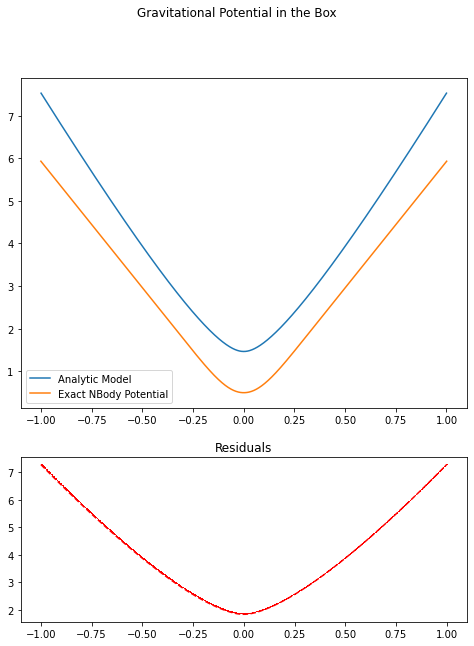

fit params = [ 0.04506443  0.07513724 -0.23803306]
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Pure/50000ParticlesOnly_Snapshots


In [3]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs/NBody_Pure" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

##### NBody Mixed


/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/50000ParticlesOnly_Snapshots
[['Time Elapsed:' '1358.6344528198242']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '9.327153662103973e-06']
 ['Variable mass:' 'True']
 ['Variable mass fraction' '0.05']
 ['sigma1' '9.327153662103973e-05']
 ['sigma2' '4.909028243212617e-06']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]
r=0.5,Num_stars = 50000.0


/home/boris/Documents/Research/FDM_n_Bodies/OneD/FDM.py:125: RuntimeWarning: invalid value encountered in true_divide
  F_s = F_s/Norm_const


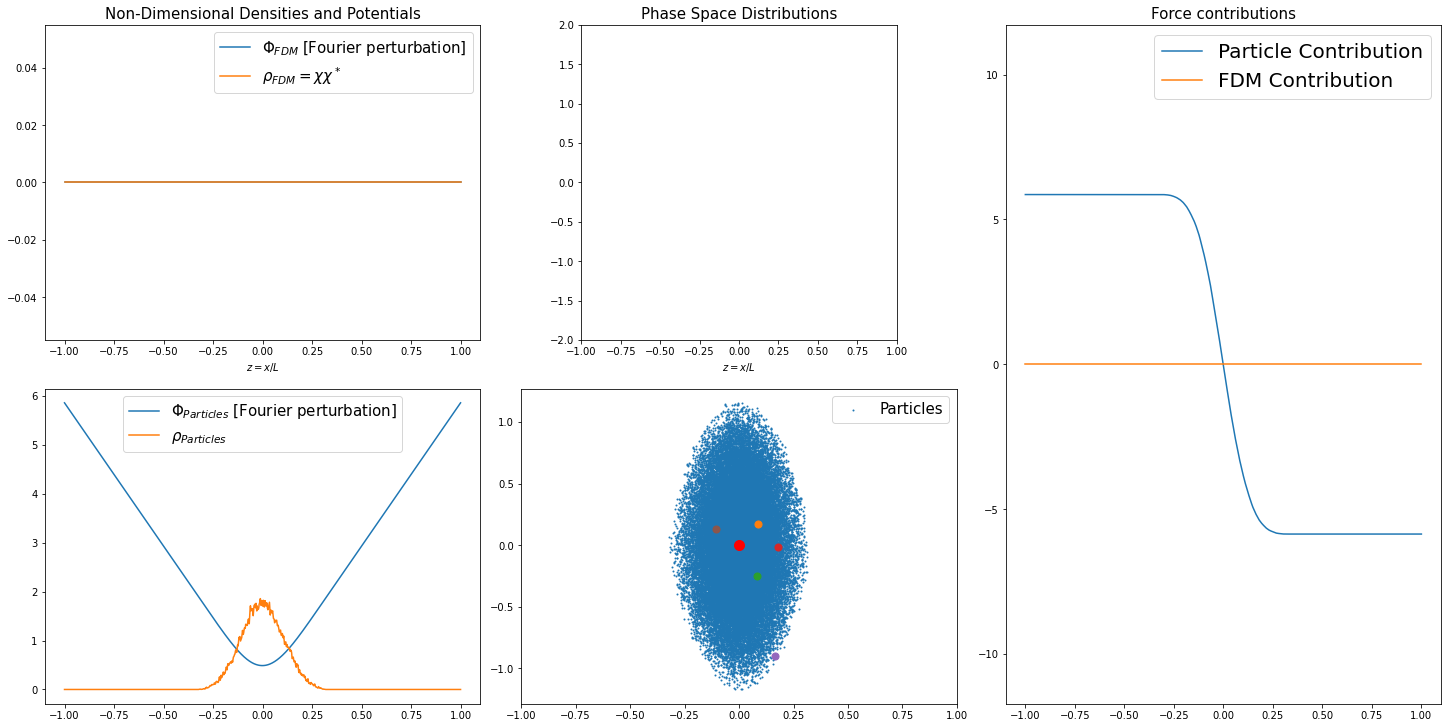

v_rms = 0.41330618762060006
z_rms = 0.10341996276854873
K_avg = 0.5*m*v_rms^2 = 7.966415434715765e-07 (m=9.327153662103973e-06)
=> 2*K_avg = 1.593283086943153e-06
W_avg = 5170.998138427436
---------Now Different Routine---------
K_tot = 0.03983207717357919
K_avg = 7.966415434715839e-07
W_tot = -0.22752027084358992
W_avg = -4.550405416871798e-06


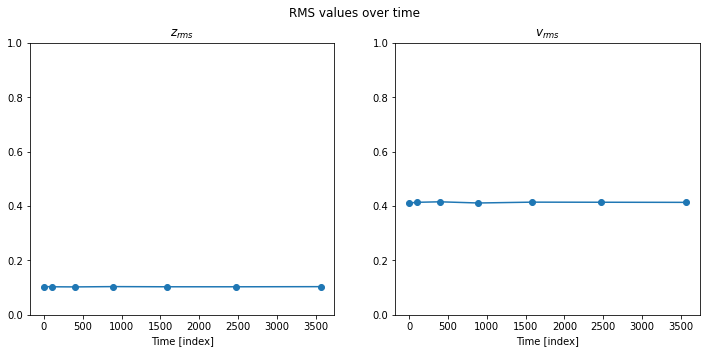

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:108: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


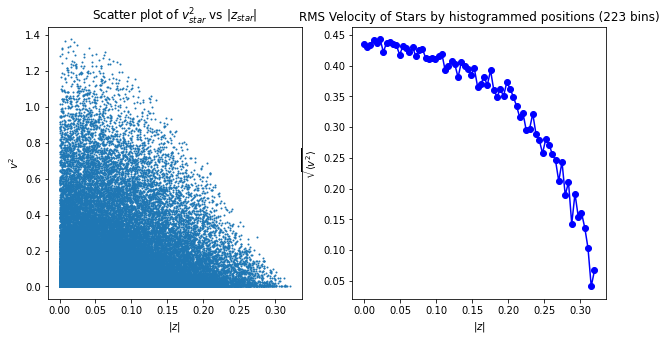

['True', 0.05, 9.327153662103973e-05, 4.909028243212617e-06]
True
50000
2500


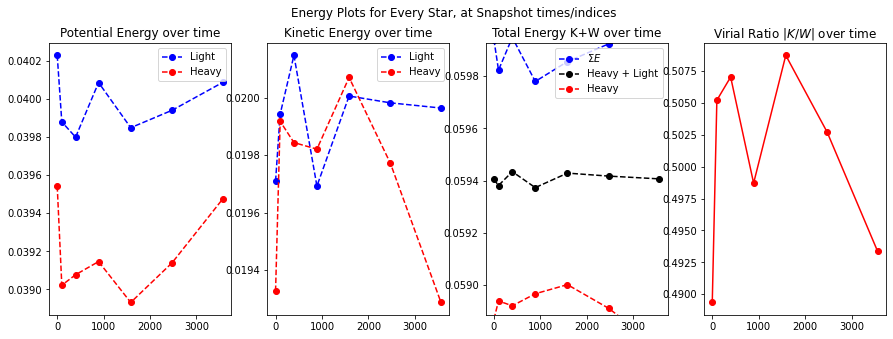

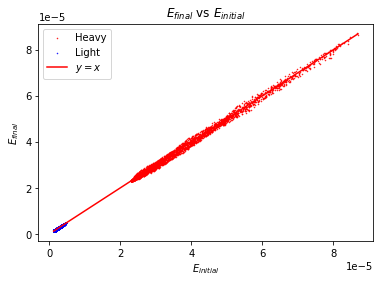

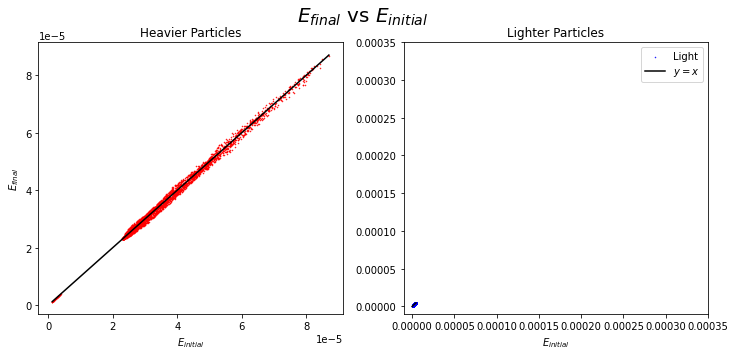

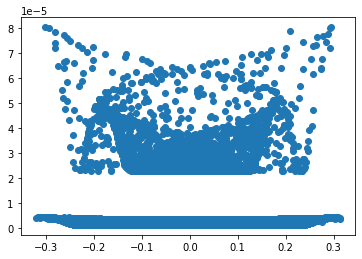

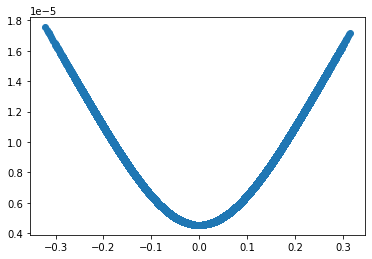

Total Potential: 0.32053602788383323
Total Potential: -0.16026801394192017
223


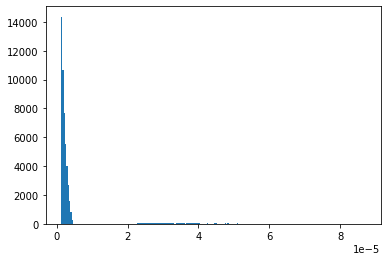

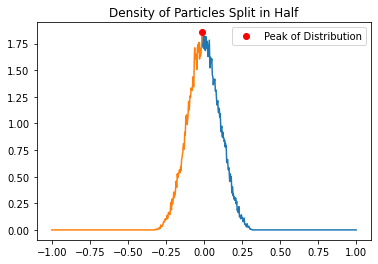

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:311: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_whole),np.log(rho_whole))


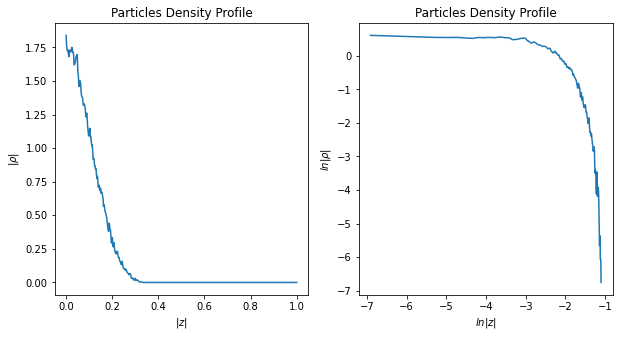

Check
Check
Check
#columns = 3
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


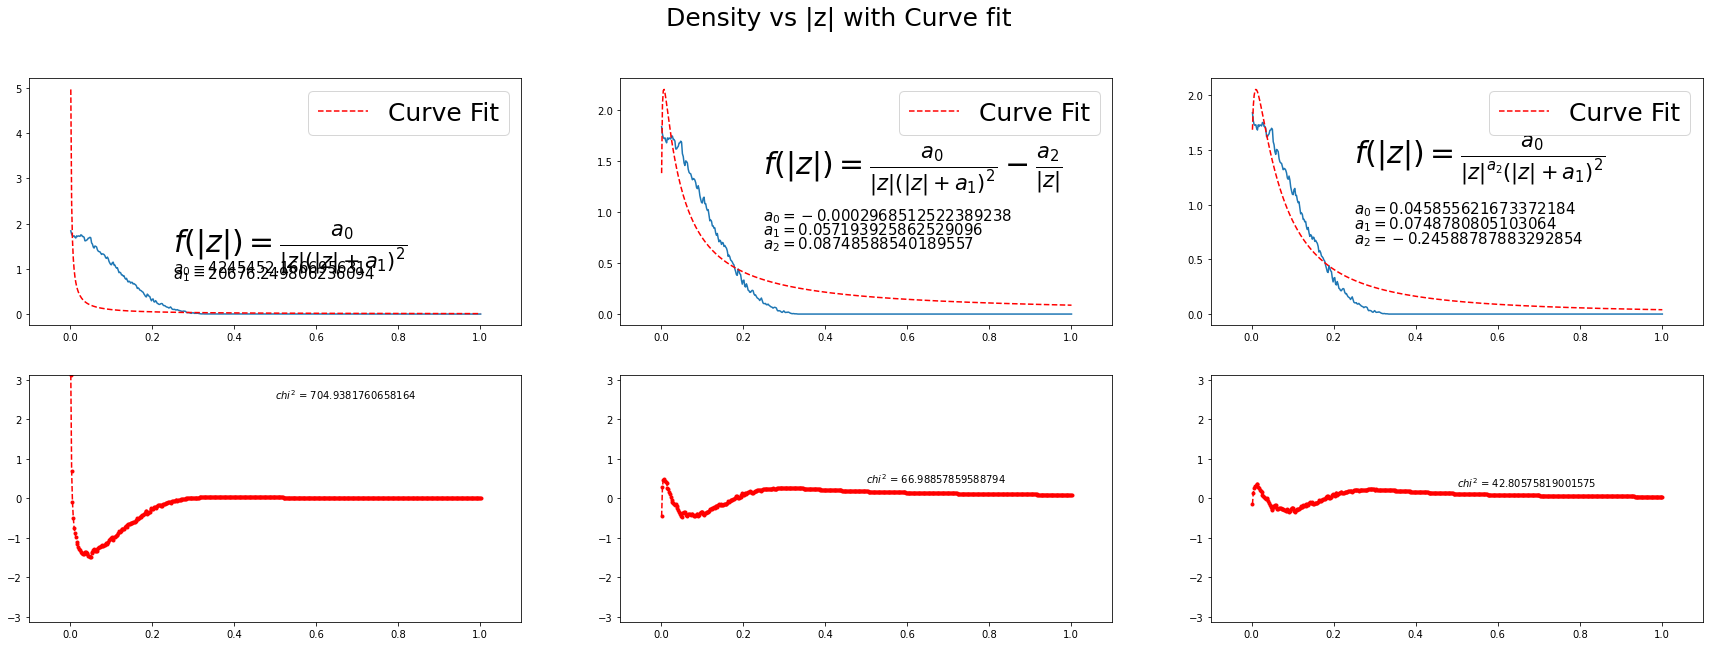

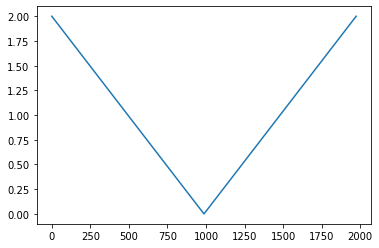

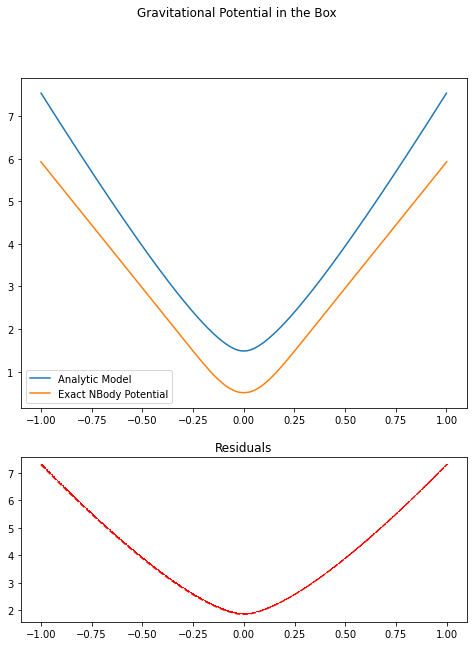

fit params = [ 0.04585562  0.07487808 -0.24588788]
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/50000ParticlesOnly_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/10000ParticlesOnly_Snapshots
[['Time Elapsed:' '194.54936957359314']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '4.663576831051987e-05']
 ['Variable mass:' 'True']
 ['Variable mass fraction' '0.05']
 ['sigma1' '0.0004663576831051987']
 ['sigma2' '2.454514121606309e-05']
 ['Number of Particles:' '10000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]
r=0.5,Num_stars = 10000.0


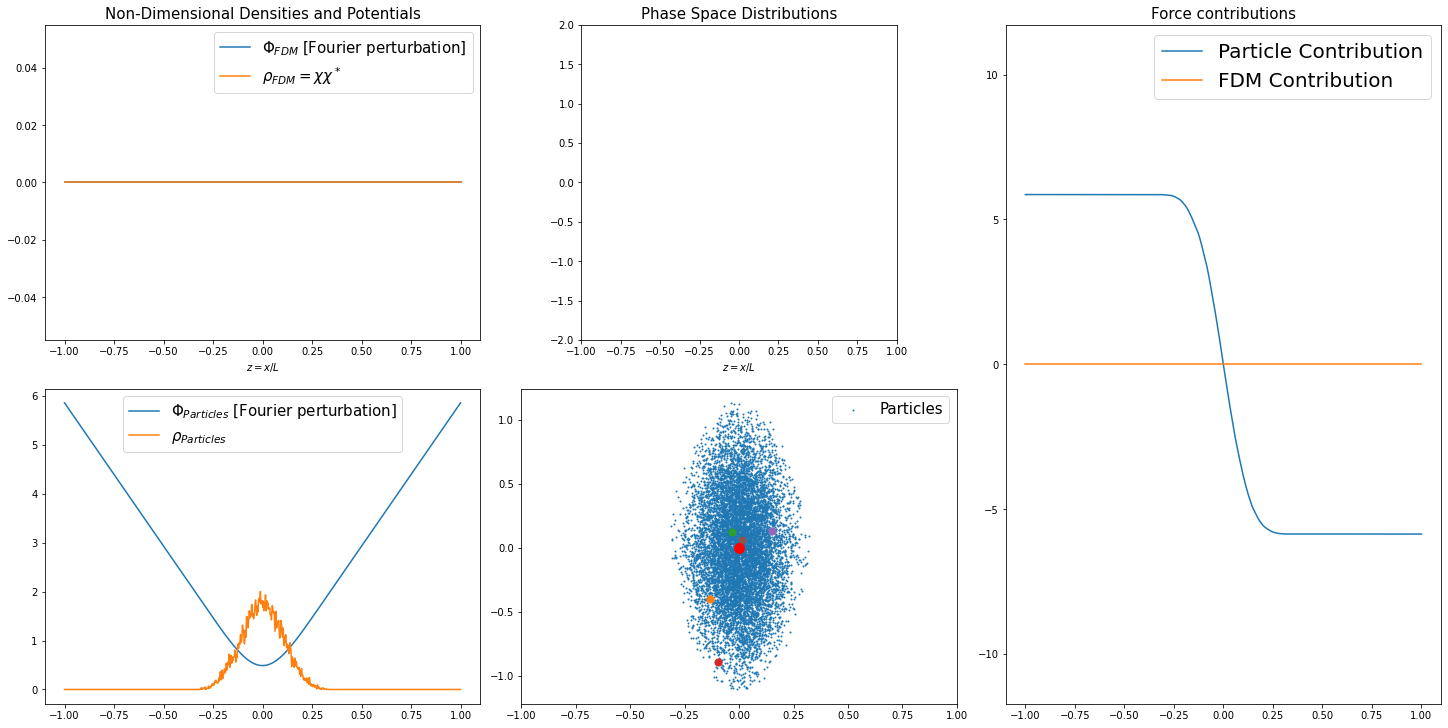

v_rms = 0.4118177088578388
z_rms = 0.10361470979637076
K_avg = 0.5*m*v_rms^2 = 3.954569172467137e-06 (m=4.663576831051987e-05)
=> 2*K_avg = 7.909138344934274e-06
W_avg = 1036.1470979637077
---------Now Different Routine---------
K_tot = 0.03954569172467141
K_avg = 3.954569172467141e-06
W_tot = -0.22755423364243882
W_avg = -2.275542336424388e-05


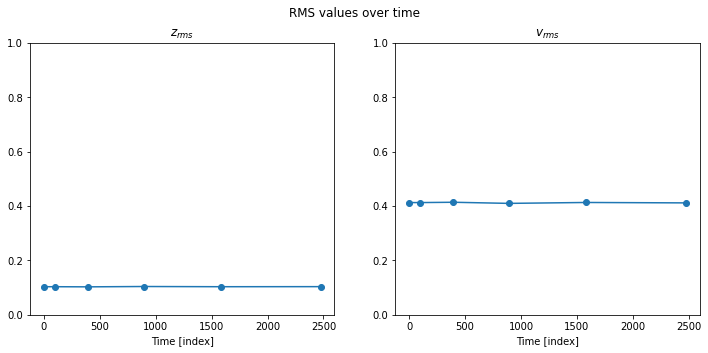

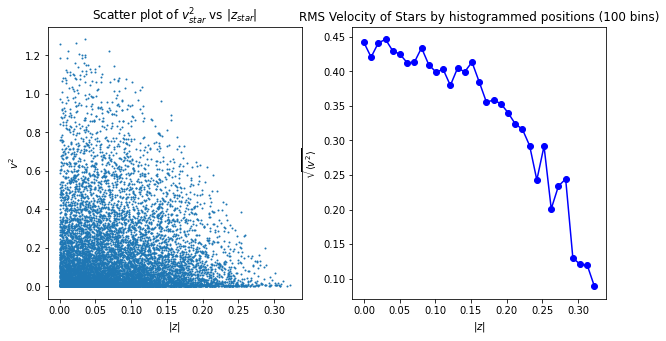

['True', 0.05, 0.0004663576831051987, 2.454514121606309e-05]
True
10000
500


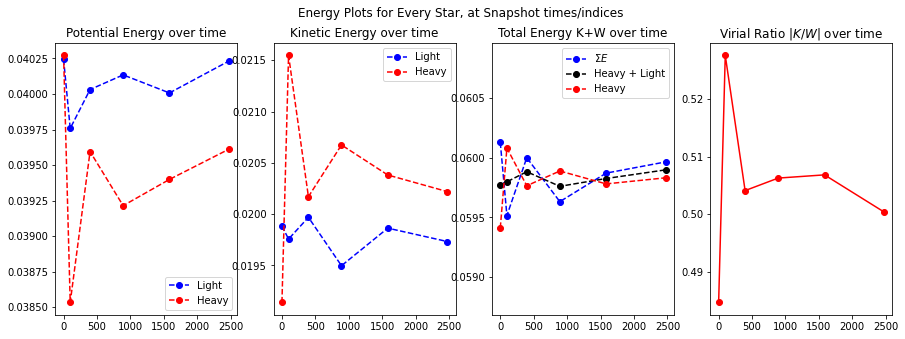

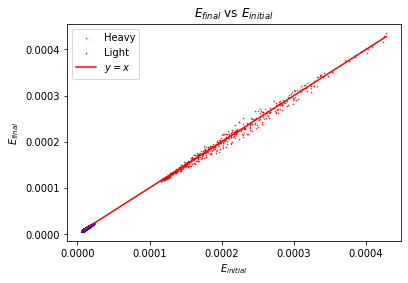

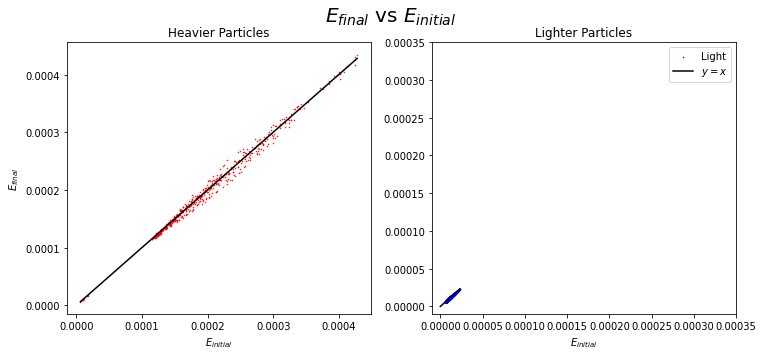

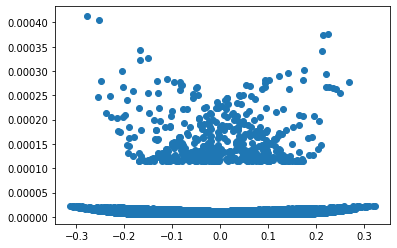

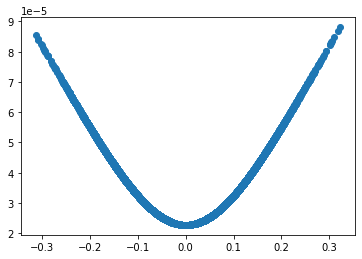

Total Potential: 0.3209892420609145
Total Potential: -0.1604946210304606
100


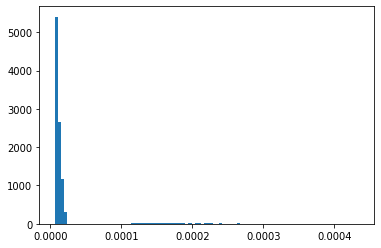

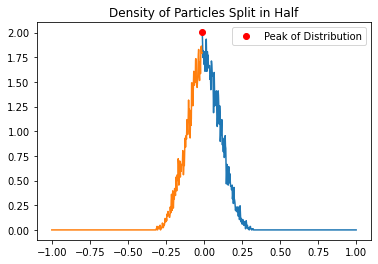

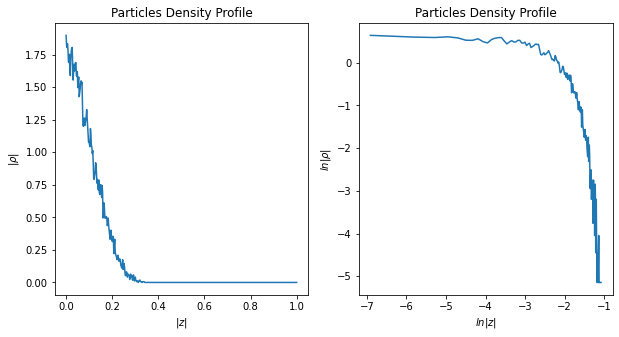

Check
Check
Check
#columns = 3
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


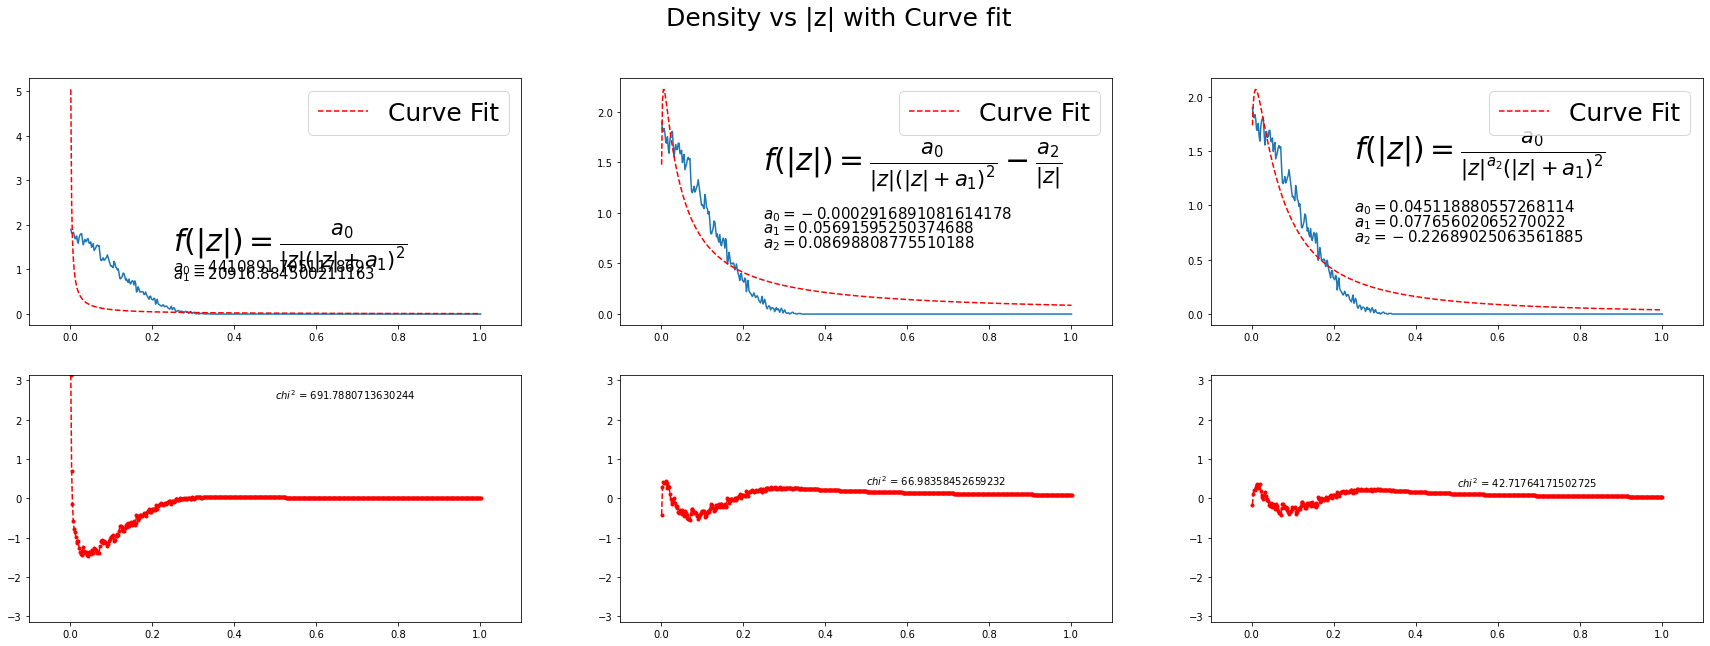

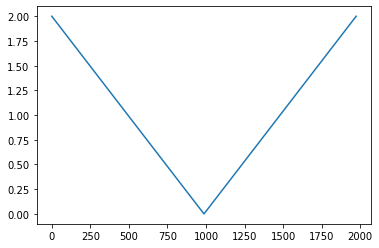

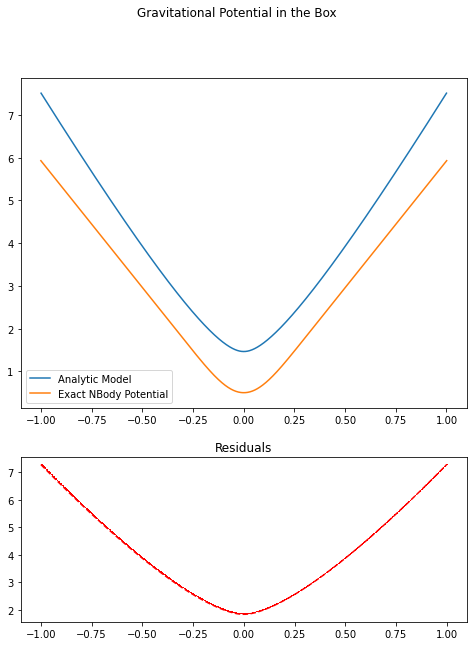

fit params = [ 0.04511888  0.07765602 -0.22689025]
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/NBody_Mixed/10000ParticlesOnly_Snapshots


In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs/NBody_Mixed" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]

r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

#### Mass Segregation / Variable Mass

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingMassSegregation
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingMassSegregation/10000ParticlesOnly_Snapshots
[['Time Elapsed:' '6564.688482999802']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '0.0001']
 ['Variable mass:' 'True']
 ['Variable mass fraction' '0.05']
 ['sigma1' '0.001']
 ['sigma2' '5.2631578947368424e-05']
 ['Number of Particles:' '10000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]
r=0.5,Num_stars = 10000.0


/home/boris/Documents/Research/FDM_n_Bodies/OneD/FDM.py:125: RuntimeWarning: invalid value encountered in true_divide
  F_s = F_s/Norm_const


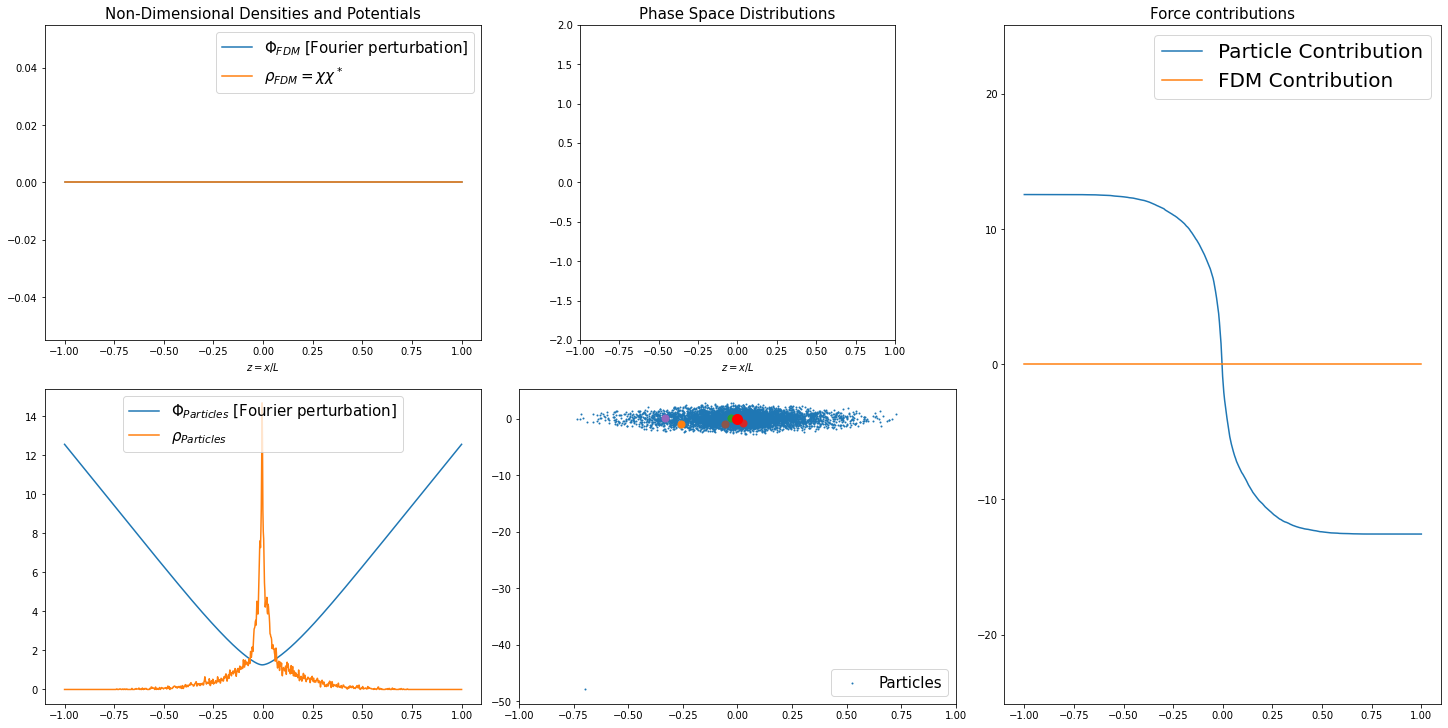

v_rms = 0.8779776932407775
z_rms = 0.15662418646110934
K_avg = 0.5*m*v_rms^2 = 3.8542241491419836e-05 (m=0.0001)
=> 2*K_avg = 7.708448298283967e-05
W_avg = 1566.2418646110934
---------Now Different Routine---------
K_tot = 0.38542241491419893
K_avg = 3.854224149141989e-05
W_tot = -1.2578680475005029
W_avg = -0.00012578680475005028


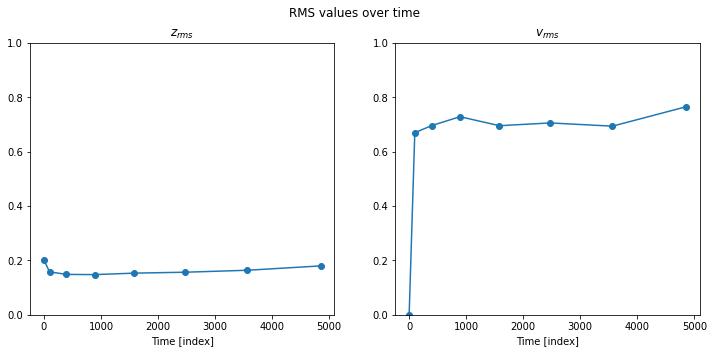

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:108: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


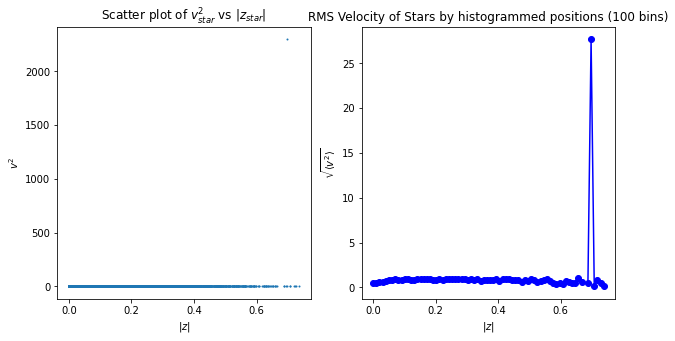

['True', 0.05, 0.001, 5.2631578947368424e-05]
True
10000
500


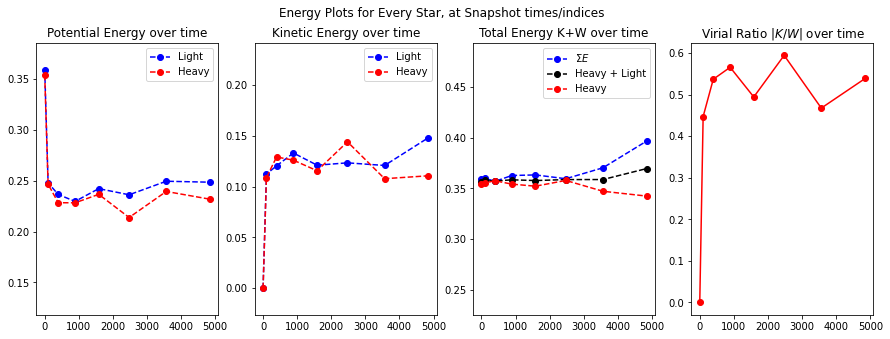

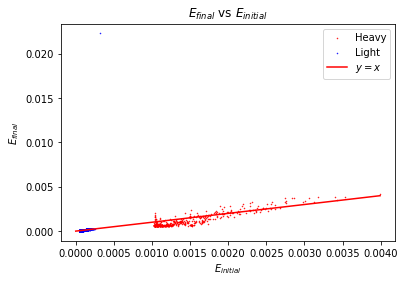

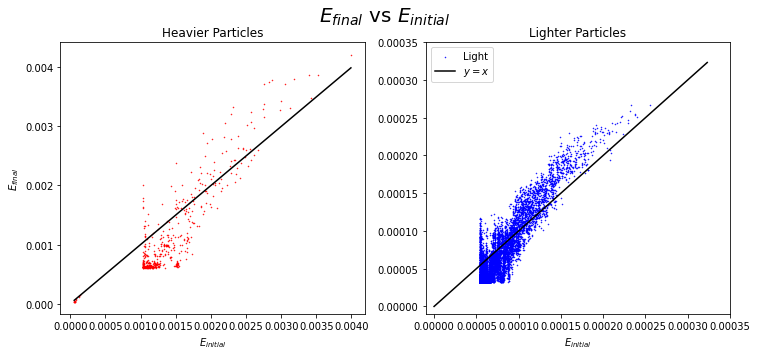

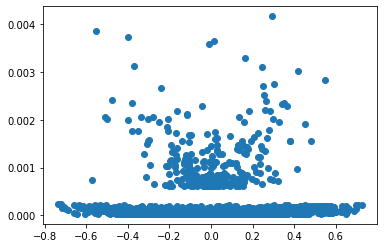

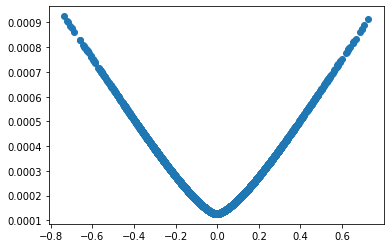

Total Potential: 2.006265273541393
Total Potential: -1.0031326367707147
100


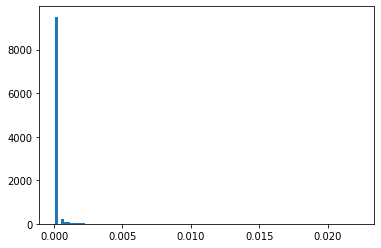

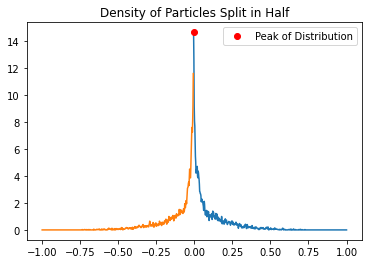

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:324: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_whole),np.log(rho_whole))


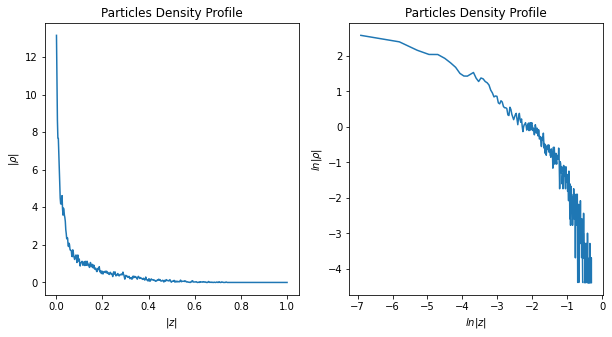

Check
Check
Check
Check
#columns = 4
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


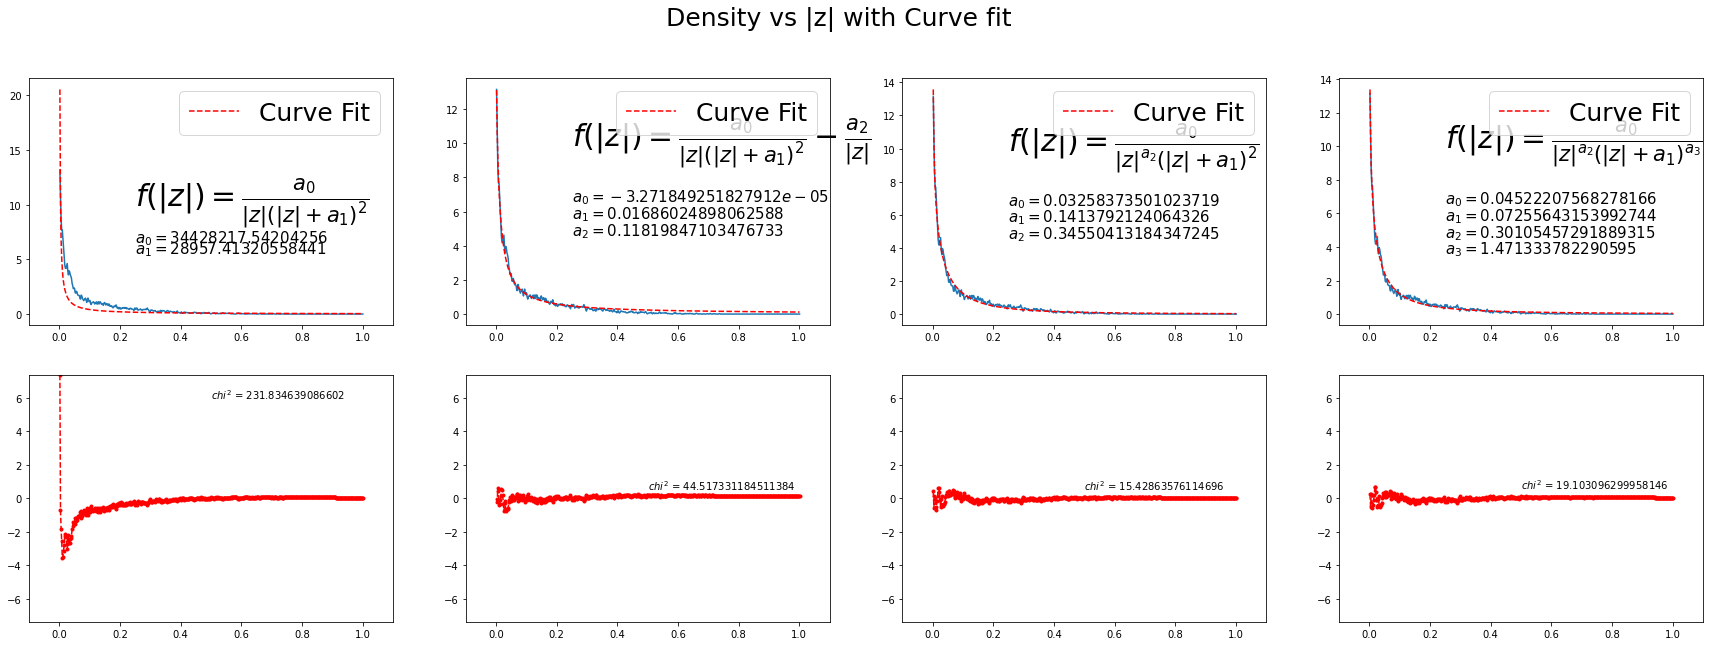

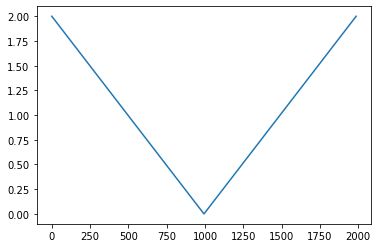

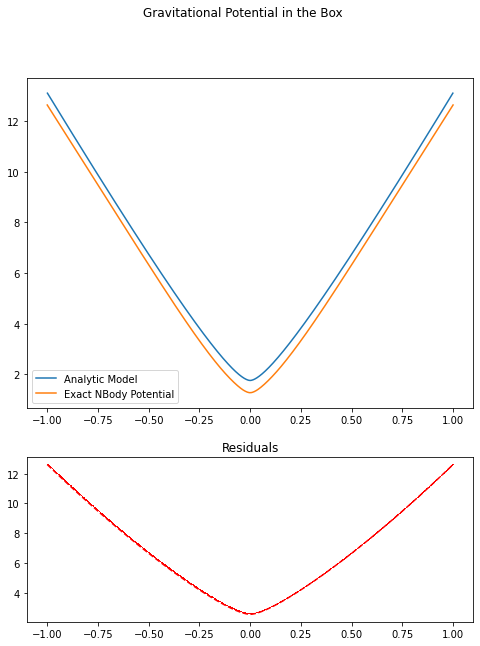

fit params = [0.04522208 0.07255643 0.30105457 1.47133378]
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingMassSegregation/10000ParticlesOnly_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingMassSegregation/50000ParticlesOnly_Snapshots
[['Time Elapsed:' '3179.1513361930847']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1']
 ['Number of bosons:' '0.0']
 ['Particle mass(es):' '2e-05']
 ['Variable mass:' 'True']
 ['Variable mass fraction' '0.1']
 ['sigma1' '0.0001']
 ['sigma2' '1.1111111111111112e-05']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.5']
 ['Grid Points:' '1000']]
r=0.5,Num_stars = 50000.0


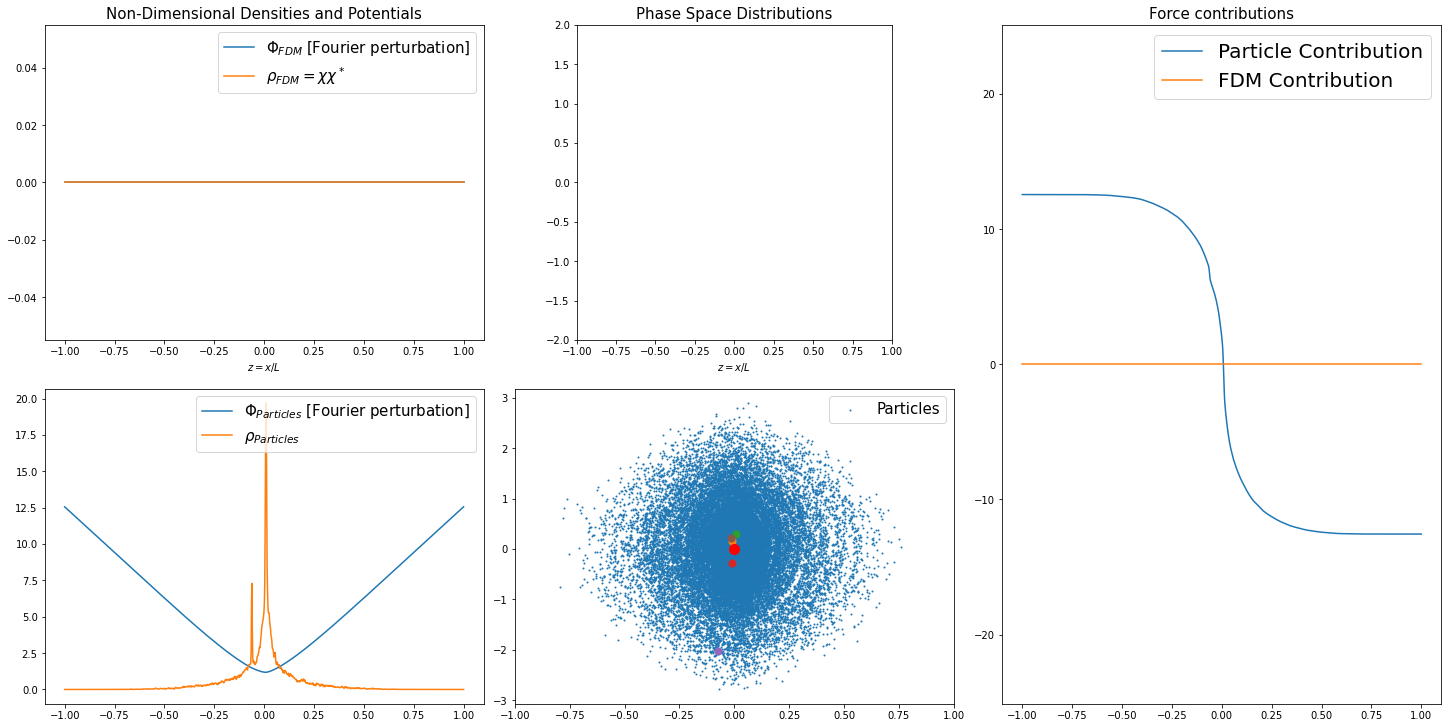

v_rms = 0.6895551782939522
z_rms = 0.14849166677713554
K_avg = 0.5*m*v_rms^2 = 4.754863439120042e-06 (m=2e-05)
=> 2*K_avg = 9.509726878240085e-06
W_avg = 7424.583338856777
---------Now Different Routine---------
K_tot = 0.2377431719560022
K_avg = 4.754863439120044e-06
W_tot = -1.1877834817552295
W_avg = -2.375566963510459e-05


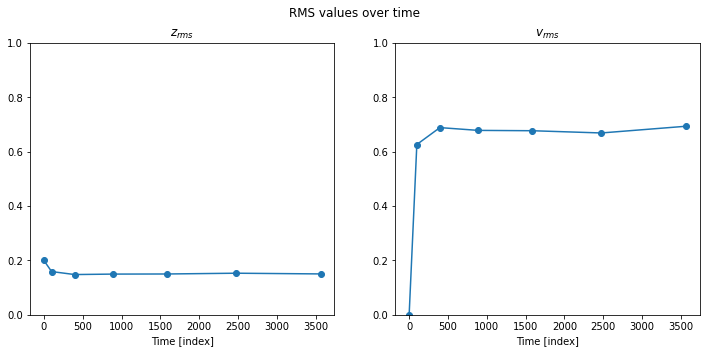

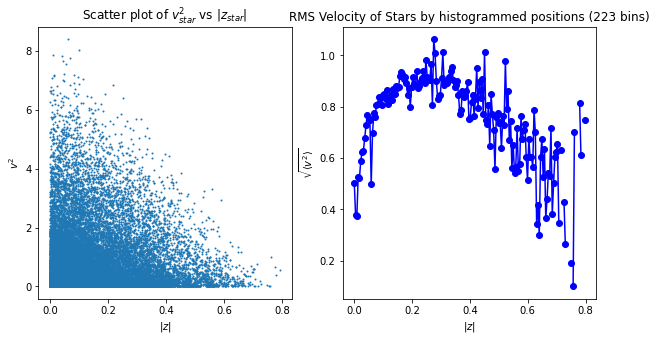

['True', 0.1, 0.0001, 1.1111111111111112e-05]
True
50000
5000


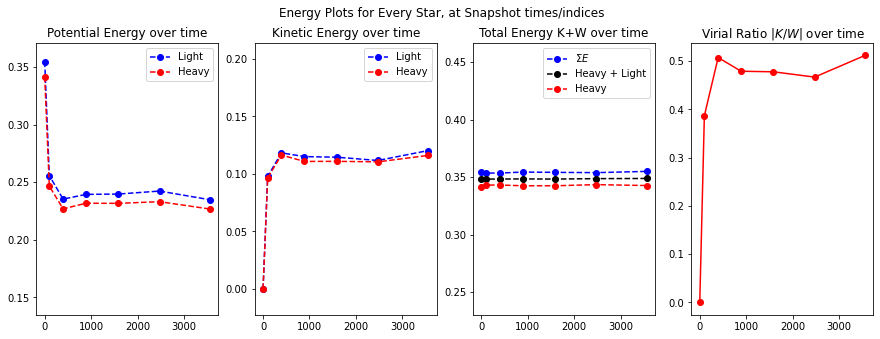

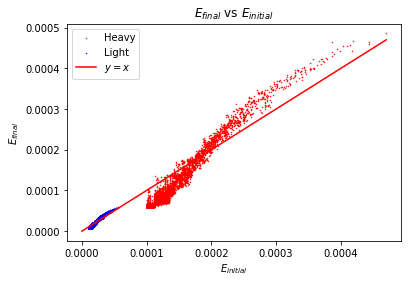

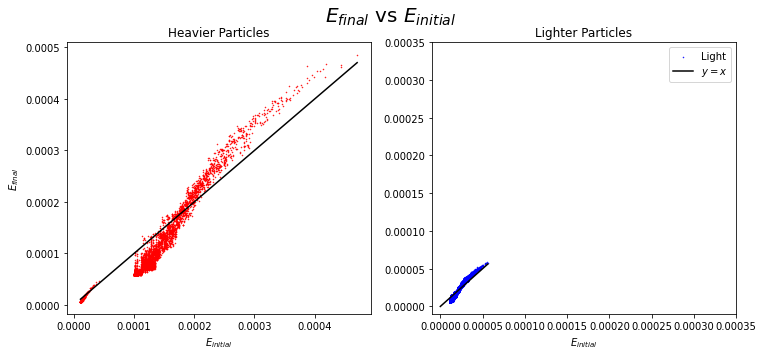

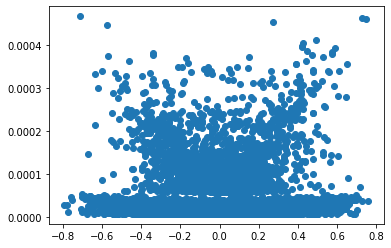

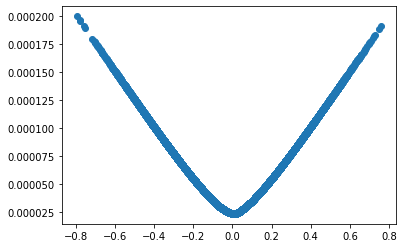

Total Potential: 1.8852445304079375
Total Potential: -0.9426222652039916
223


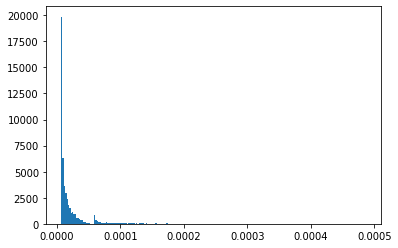

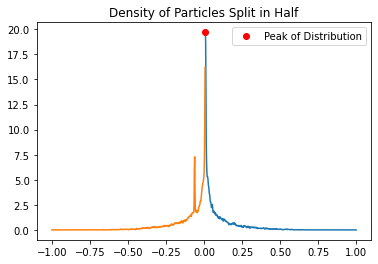

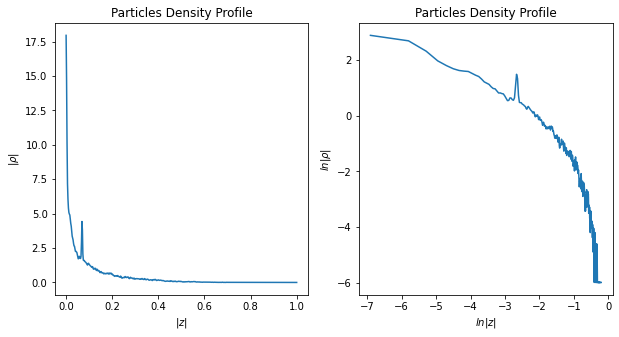

Check
Check
Check
#columns = 3
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


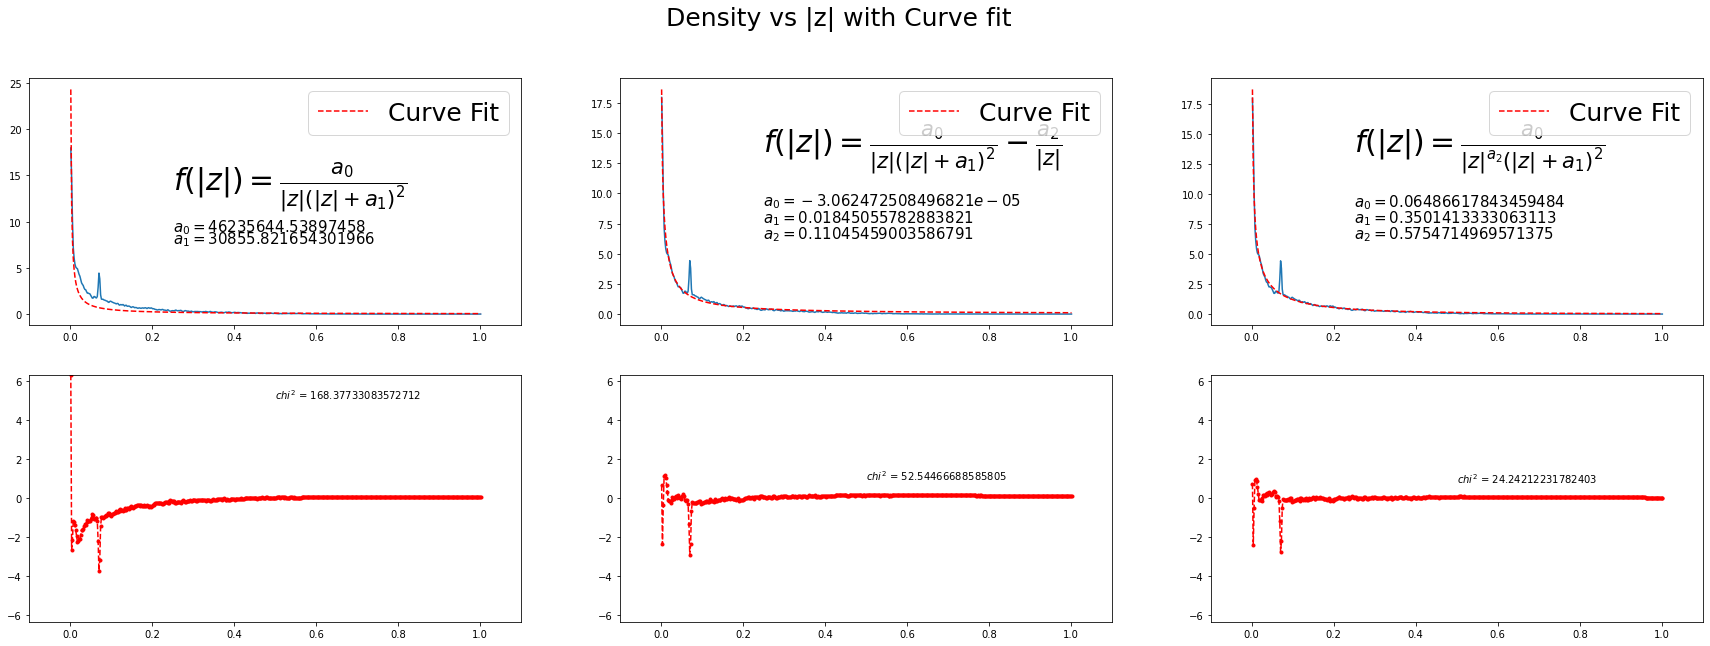

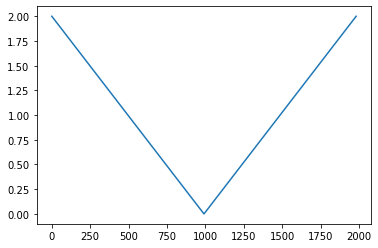

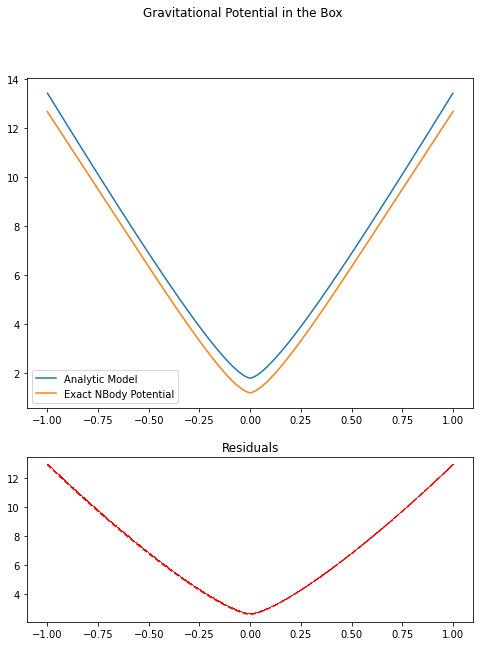

fit params = [0.06486618 0.35014133 0.5754715 ]
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingMassSegregation/50000ParticlesOnly_Snapshots


In [3]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingMassSegregation" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["5ParticlesOnly_Snapshots","1000ParticlesOnly_Snapshots","10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots","100000ParticlesOnly_Snapshots"]
folders = ["10000ParticlesOnly_Snapshots","50000ParticlesOnly_Snapshots"]
#folders = ["50000ParticlesOnly_Snapshots"]


r_s = []
z_rms_s = []
v_rms_s = []
params = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, z_rms, v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)
    params.append(popt)

    print(os.getcwd()) 

## Isolated FDM

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.0007292479492470644_Snapshots
[['Time Elapsed:' '48.4415123462677']
 ['Box Length:' '2.0']
 ['Boson Mass:' '685.6378554320805']
 ['Number of bosons:' '0.001458495898494129']
 ['Particle mass(es):' '0']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '0']
 ['sigma2' '0']
 ['Number of Particles:' '0']
 ['FDM Fuzziness:' '0.0007292479492470644']
 ['Grid Points:' '3072']]
r=0.0007292479492470644,Num_stars = 0.0
6


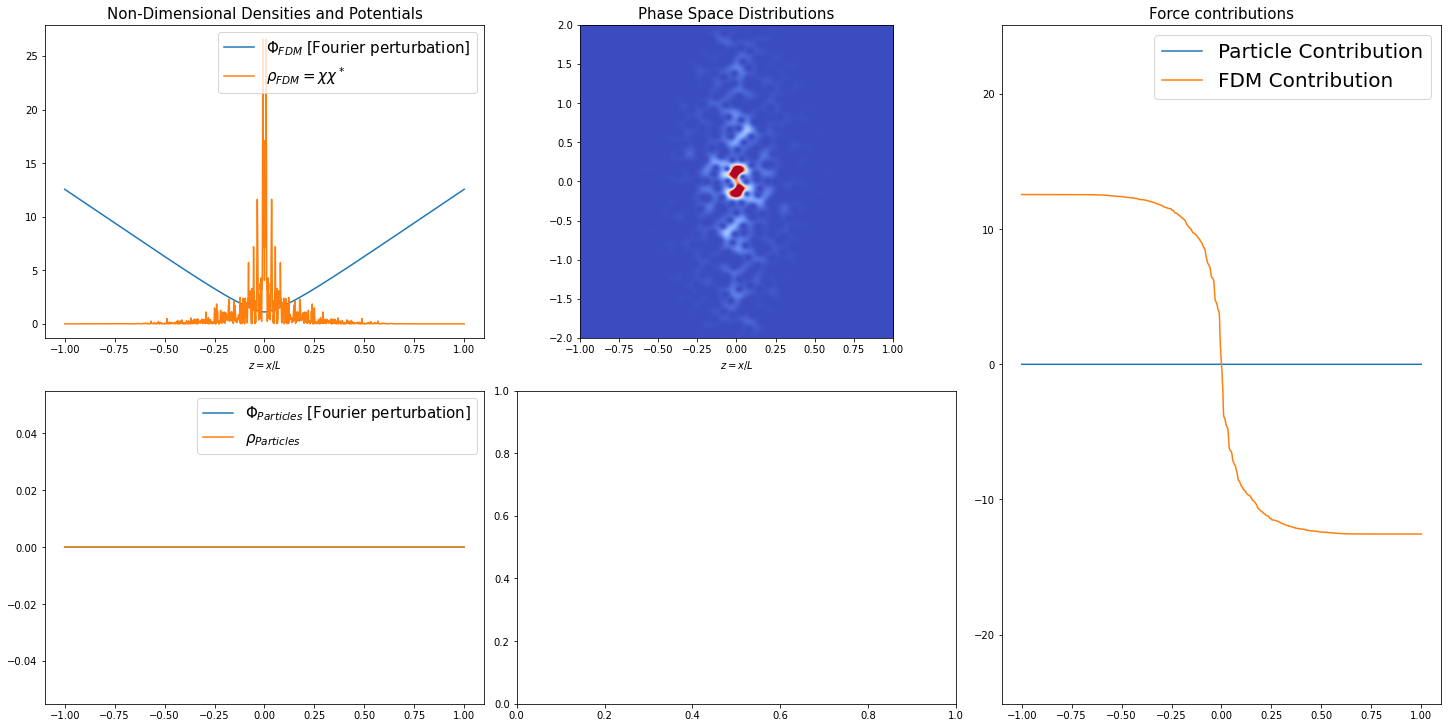

sum chi^2 = 6879.802917965439


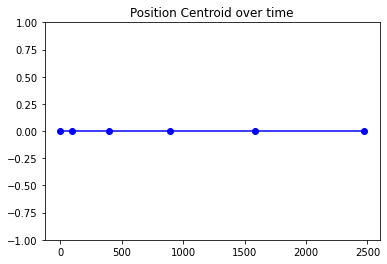

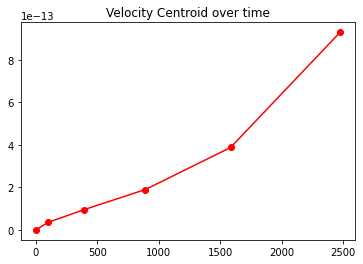

4718592.0
0.0014584950693749769


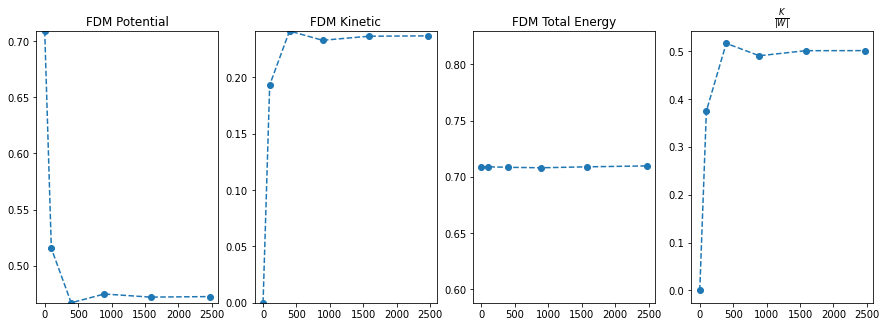

1.0000000000000002


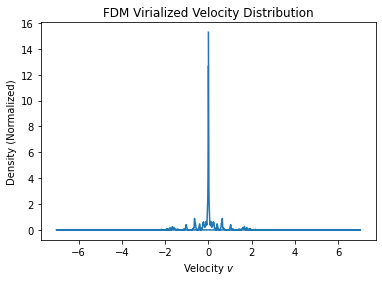

-6.891652264460386e-12


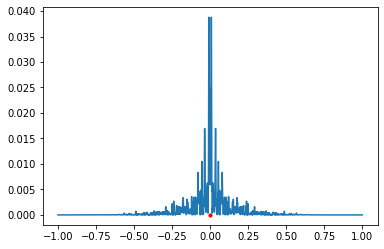

z_rms = 0.10112209562965177
v_rms = 0.17643681011998452
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.0007292479492470644_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.0003646239746235322_Snapshots
[['Time Elapsed:' '110.20709180831909']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1371.275710864161']
 ['Number of bosons:' '0.0007292479492470644']
 ['Particle mass(es):' '0']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '0']
 ['sigma2' '0']
 ['Number of Particles:' '0']
 ['FDM Fuzziness:' '0.0003646239746235322']
 ['Grid Points:' '6120']]
r=0.0003646239746235322,Num_stars = 0.0
6


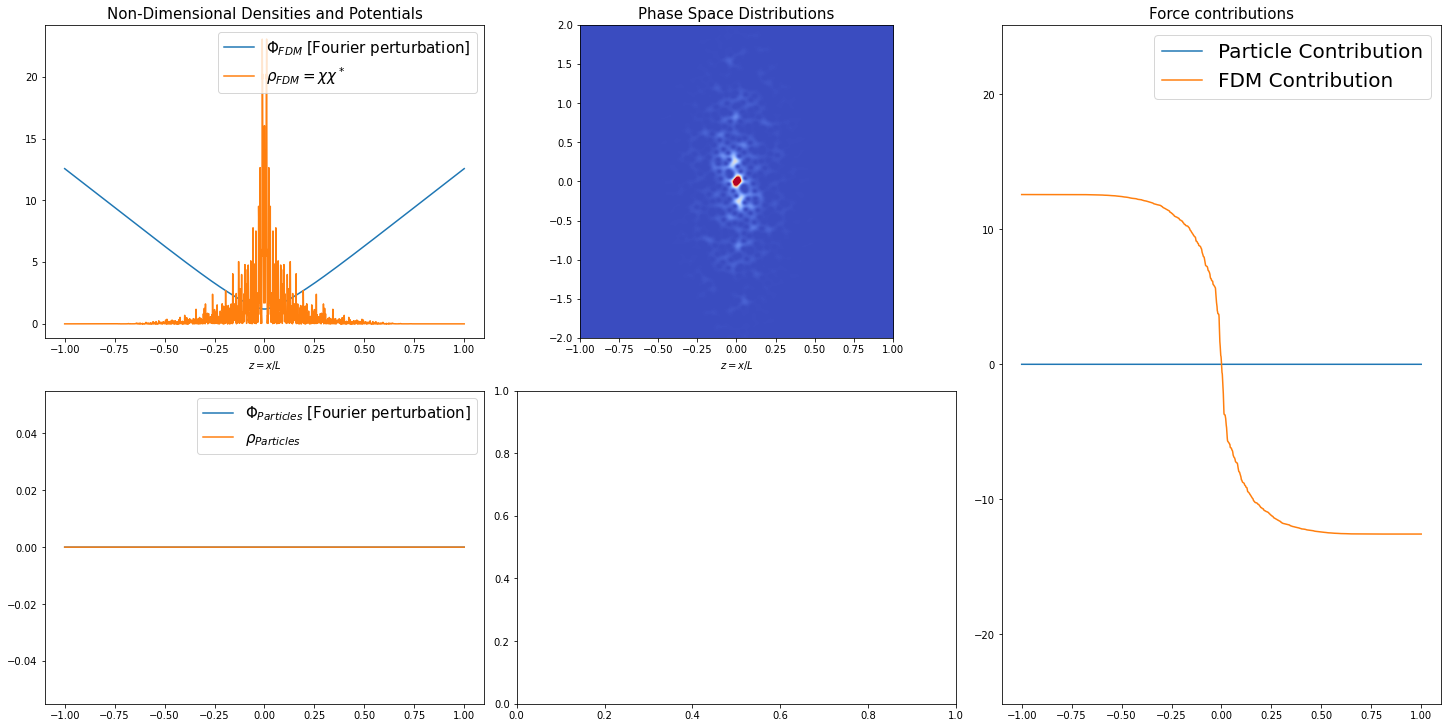

sum chi^2 = 13654.532901347133


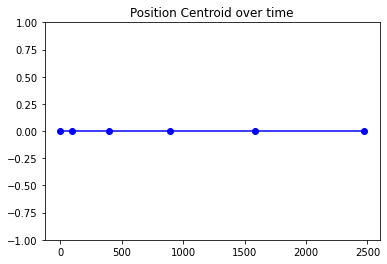

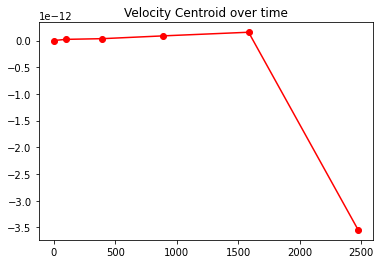

18727200.0
0.0007292475329359721


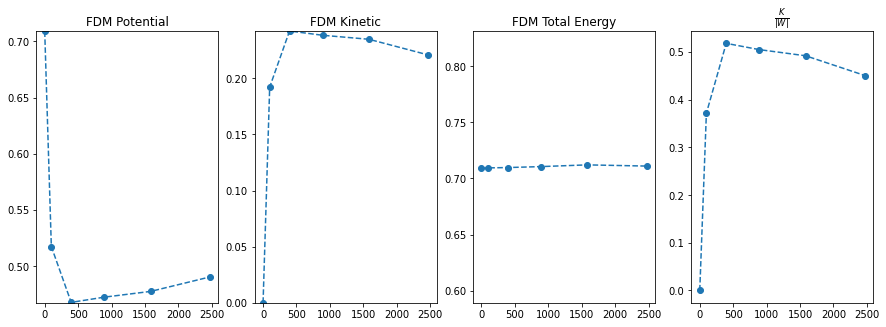

0.9999999999999998


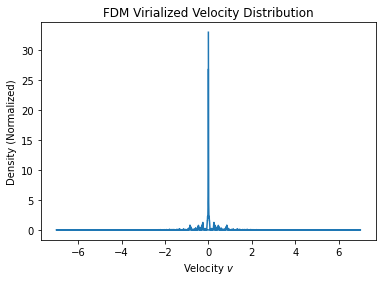

-4.744602218987357e-12


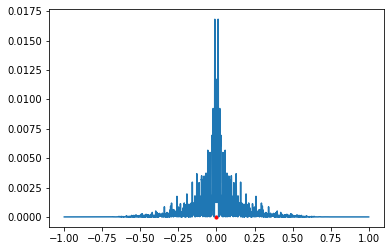

z_rms = 0.10607923339386091
v_rms = 0.14341600326824647
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.0003646239746235322_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.007292479492470644_Snapshots
[['Time Elapsed:' '18.932882070541382']
 ['Box Length:' '2.0']
 ['Boson Mass:' '68.56378554320806']
 ['Number of bosons:' '0.014584958984941289']
 ['Particle mass(es):' '0']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '0']
 ['sigma2' '0']
 ['Number of Particles:' '0']
 ['FDM Fuzziness:' '0.007292479492470644']
 ['Grid Points:' '336']]
r=0.007292479492470644,Num_stars = 0.0
6


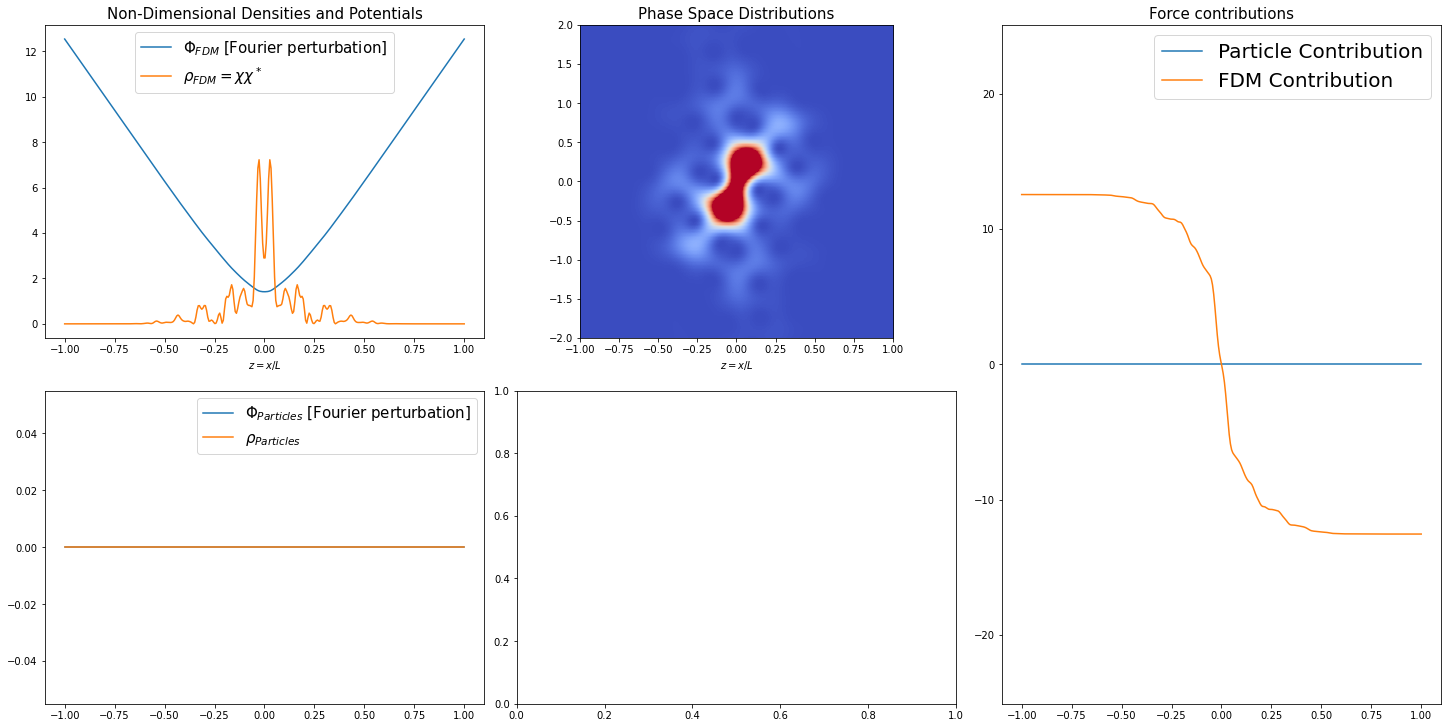

sum chi^2 = 820.8410566040683


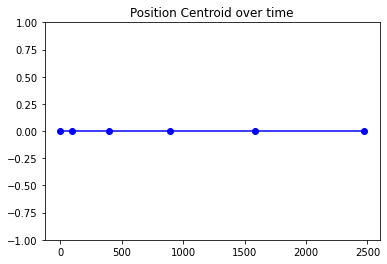

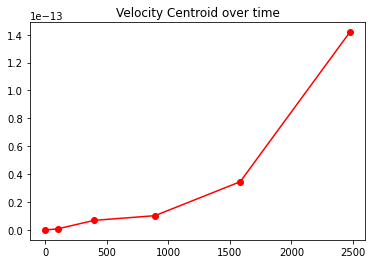

56448.0
0.014584951254514242


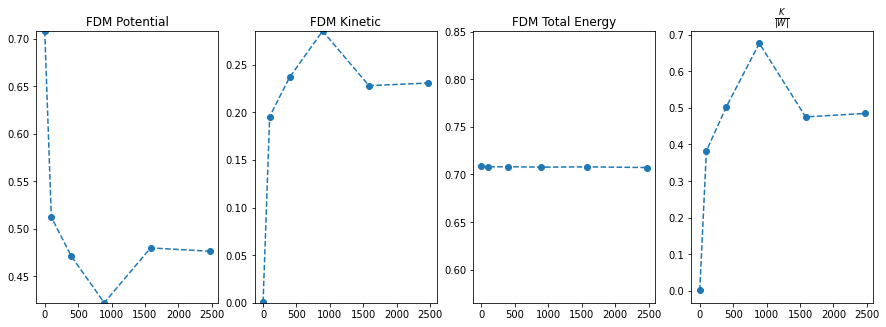

1.0


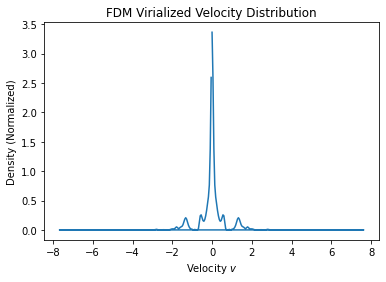

-5.010929257252977e-13


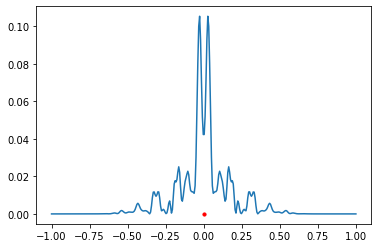

z_rms = 0.11737685308898657
v_rms = 0.15579479106874838
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.007292479492470644_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.014584958984941289_Snapshots
[['Time Elapsed:' '18.91080331802368']
 ['Box Length:' '2.0']
 ['Boson Mass:' '34.28189277160403']
 ['Number of bosons:' '0.029169917969882577']
 ['Particle mass(es):' '0']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '0']
 ['sigma2' '0']
 ['Number of Particles:' '0']
 ['FDM Fuzziness:' '0.014584958984941289']
 ['Grid Points:' '192']]
r=0.014584958984941289,Num_stars = 0.0
6


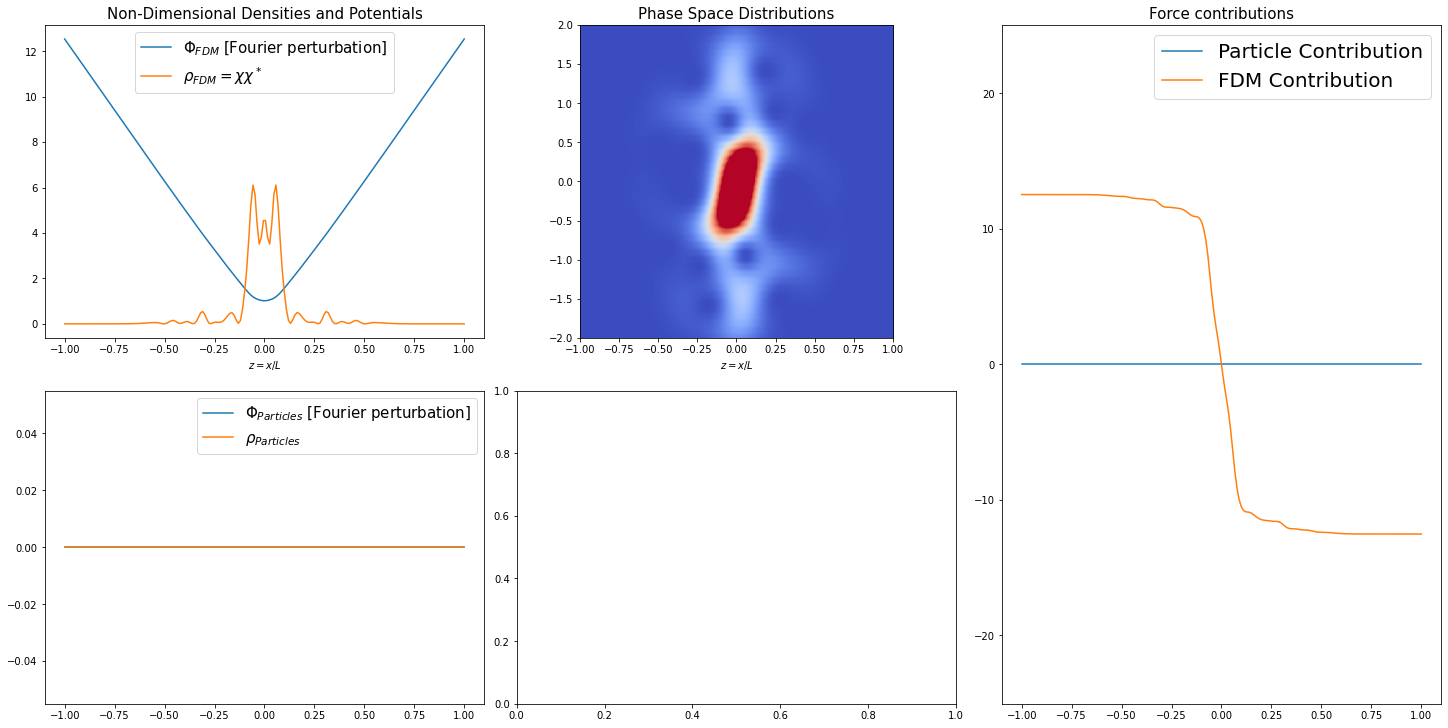

sum chi^2 = 534.8593490769074


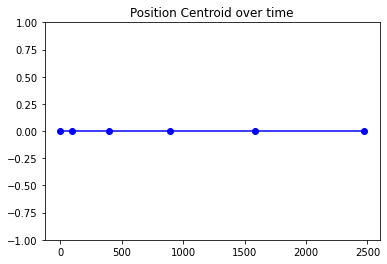

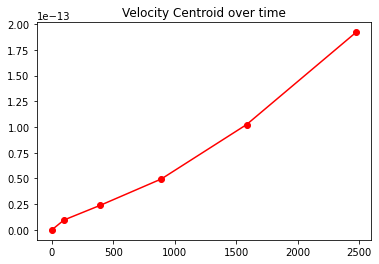

18432.0
0.029169903418243232


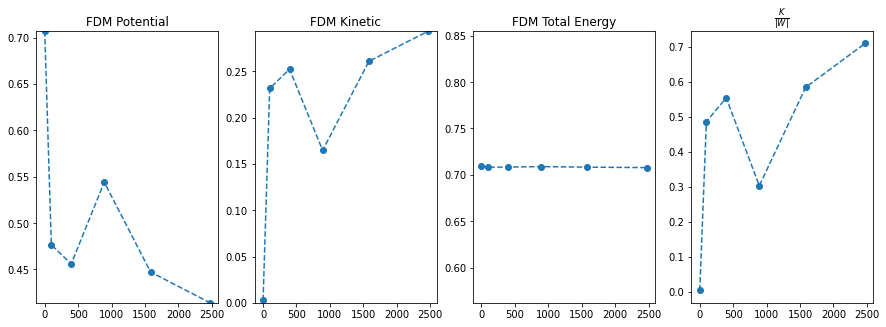

1.0


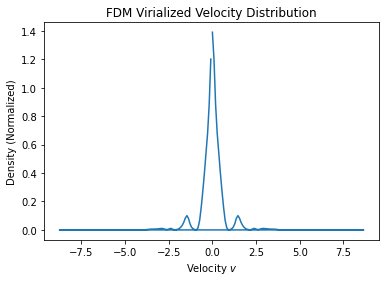

-1.290372738184932e-12


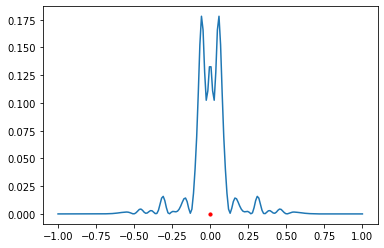

z_rms = 0.08999860072342117
v_rms = 0.15980553486905338
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.014584958984941289_Snapshots
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.003646239746235322_Snapshots
[['Time Elapsed:' '19.45701289176941']
 ['Box Length:' '2.0']
 ['Boson Mass:' '137.1275710864161']
 ['Number of bosons:' '0.007292479492470644']
 ['Particle mass(es):' '0']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '0']
 ['sigma2' '0']
 ['Number of Particles:' '0']
 ['FDM Fuzziness:' '0.003646239746235322']
 ['Grid Points:' '648']]
r=0.003646239746235322,Num_stars = 0.0
6


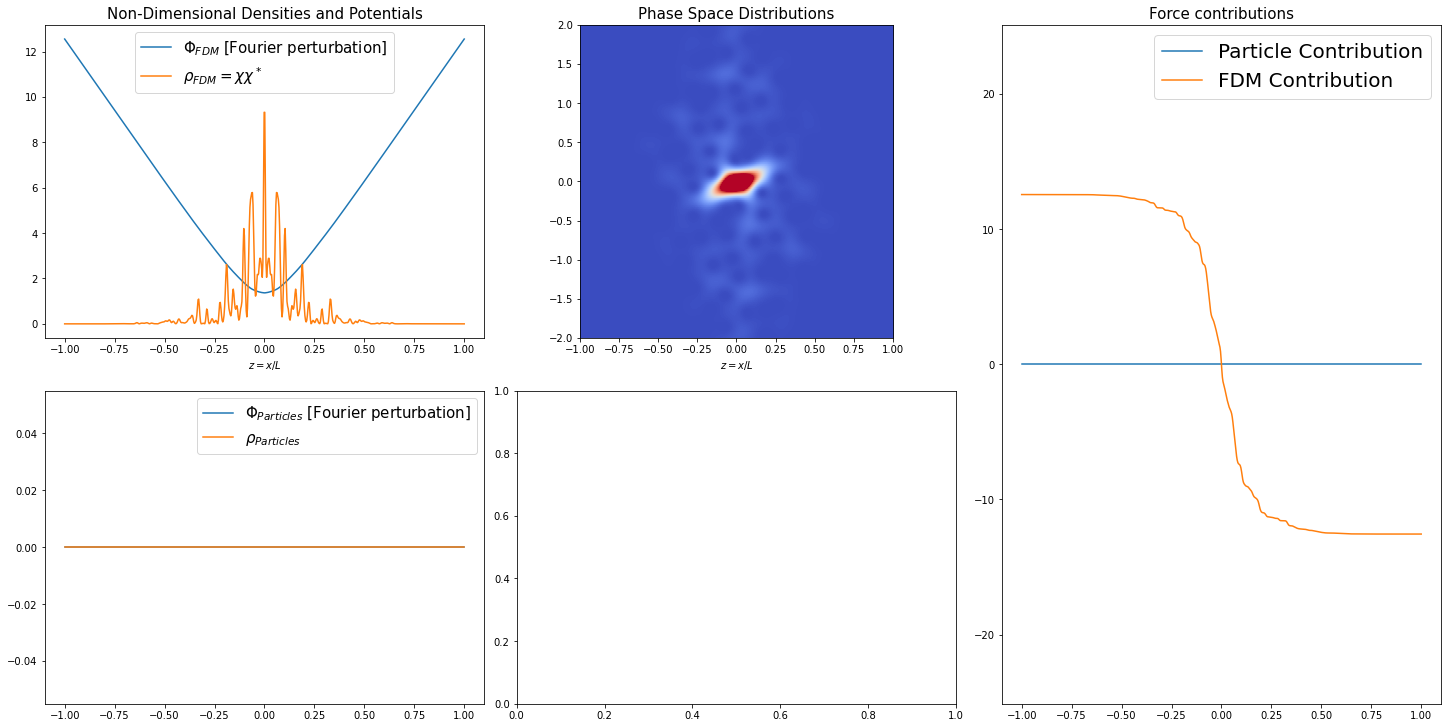

sum chi^2 = 1528.7070493083352


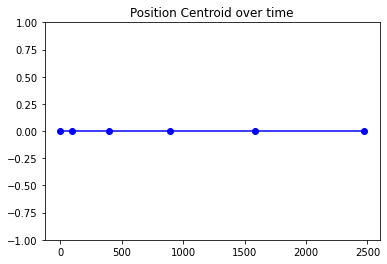

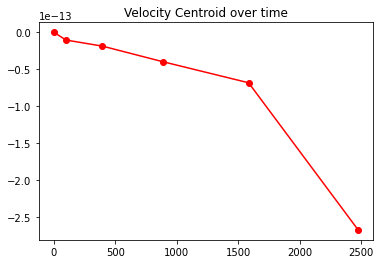

209952.0
0.007292475477075381


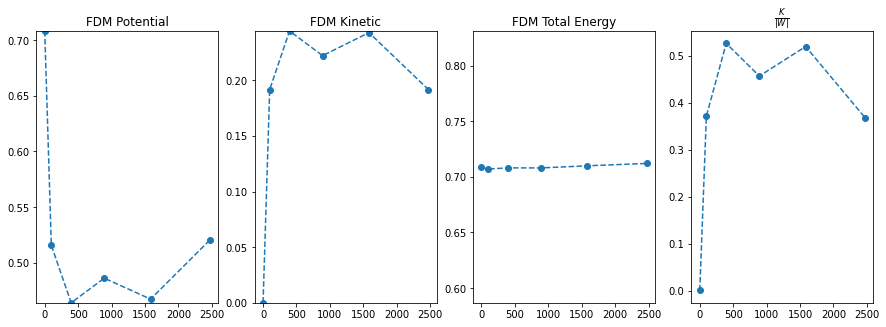

1.0


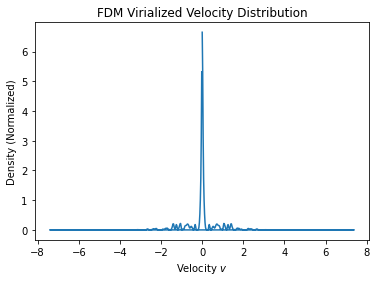

9.817861664297105e-13


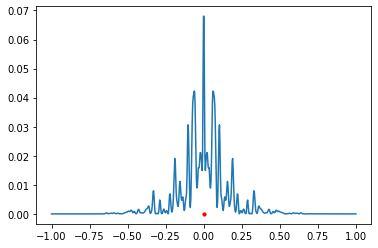

z_rms = 0.10915671378386685
v_rms = 0.18716006179420708
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/FDM/OnlyFDM_r0.003646239746235322_Snapshots


In [4]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/FDM" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
# folders  = ["OnlyFDM_r0.014584958984941289_Snapshots",
#             "OnlyFDM_r0.007292479492470644_Snapshots",
#             "OnlyFDM_r0.0007292479492470644_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_bosons, z_rms, v_rms = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

#### Equilibrium ICs

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/FDM
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/FDM/OnlyFDM_r0.0003646239746235322_Snapshots
[['Time Elapsed:' '274.588835477829']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1371.275710864161']
 ['Number of bosons:' '0.0007292479492470644']
 ['Particle mass(es):' '0']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '0']
 ['sigma2' '0']
 ['Number of Particles:' '0']
 ['FDM Fuzziness:' '0.0003646239746235322']
 ['Grid Points:' '6120']]
r=0.0003646239746235322,Num_stars = 0.0
7


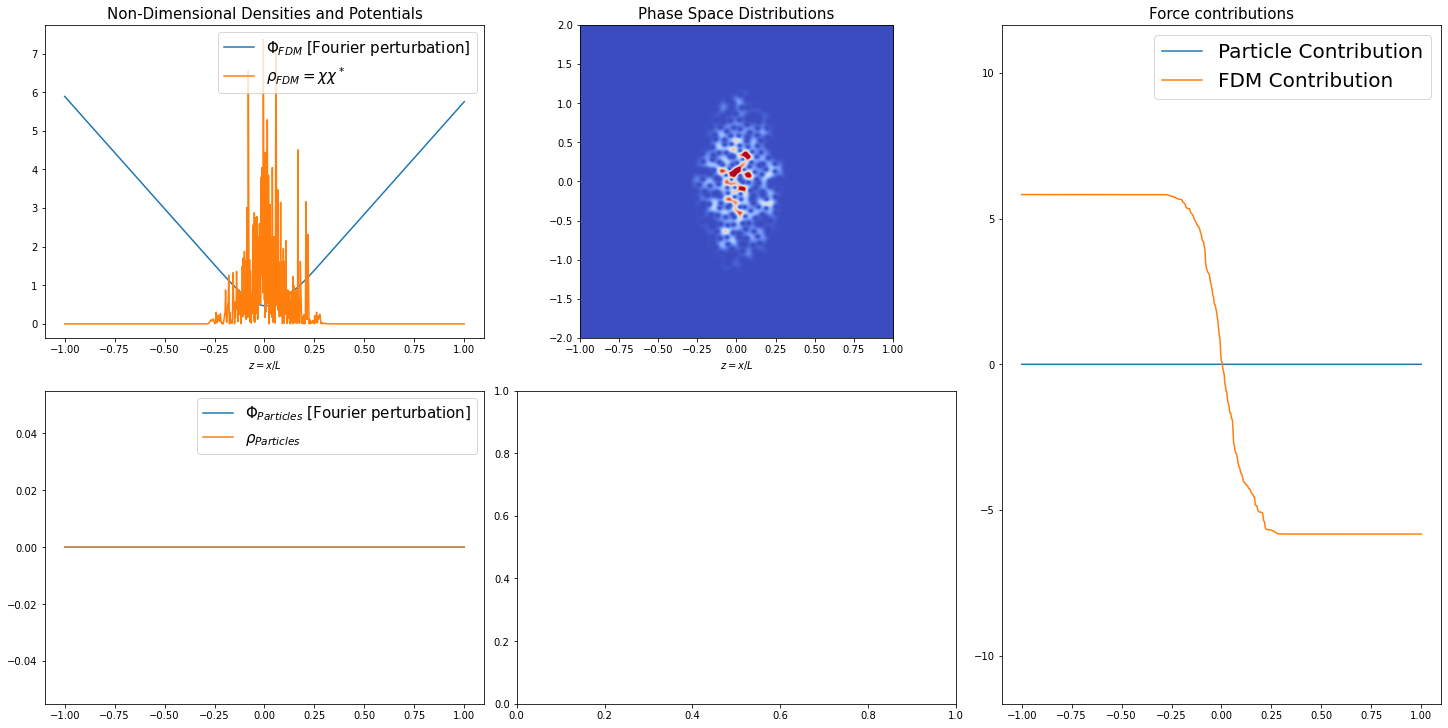

sum chi^2 = 6327.015159347318


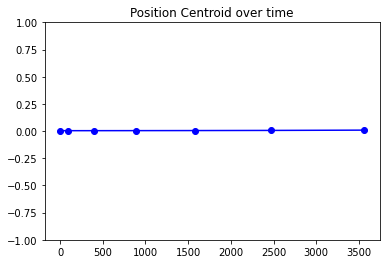

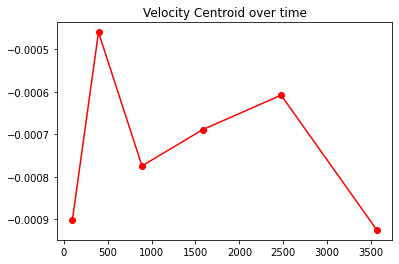

18727200.0
0.0003379068496255426


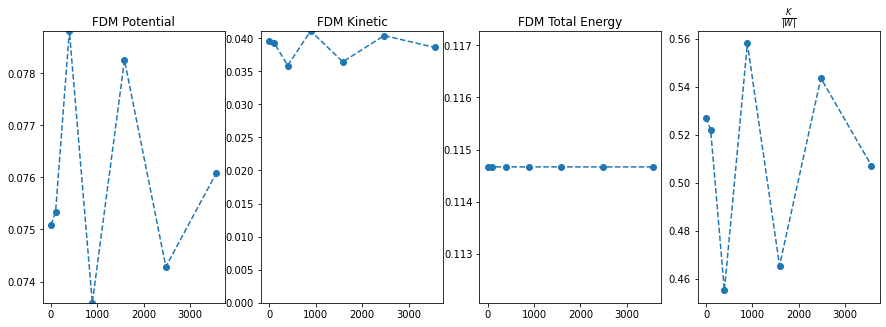

1.0


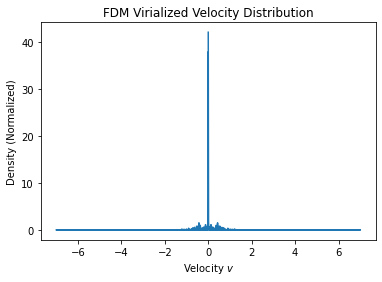

0.011808997546776173


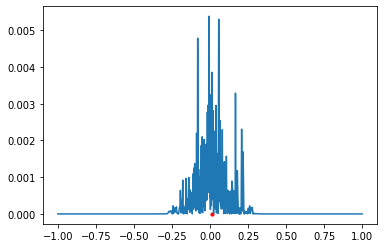

z_rms = 0.06181344174158431
v_rms = 0.10571455467560104
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/FDM/OnlyFDM_r0.0003646239746235322_Snapshots


In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs/FDM" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
#folders  = ["OnlyFDM_r0.0007292479492470644_Snapshots"]
r_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_bosons, z_rms, v_rms = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

## Isolated Full

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/Full
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/Full/FDM0.5_r0.008157645763118187_Snapshots
[['Time Elapsed:' '3514.189070701599']
 ['Box Length:' '2.0']
 ['Boson Mass:' '61.29219317913598']
 ['Number of bosons:' '0.008157645763118187']
 ['Particle mass(es):' '1e-05']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '1e-05']
 ['sigma2' '0']
 ['Number of Particles:' '50000']
 ['FDM Fuzziness:' '0.008157645763118187']
 ['Grid Points:' '1000']]
r=0.008157645763118187,Num_stars = 50000.0


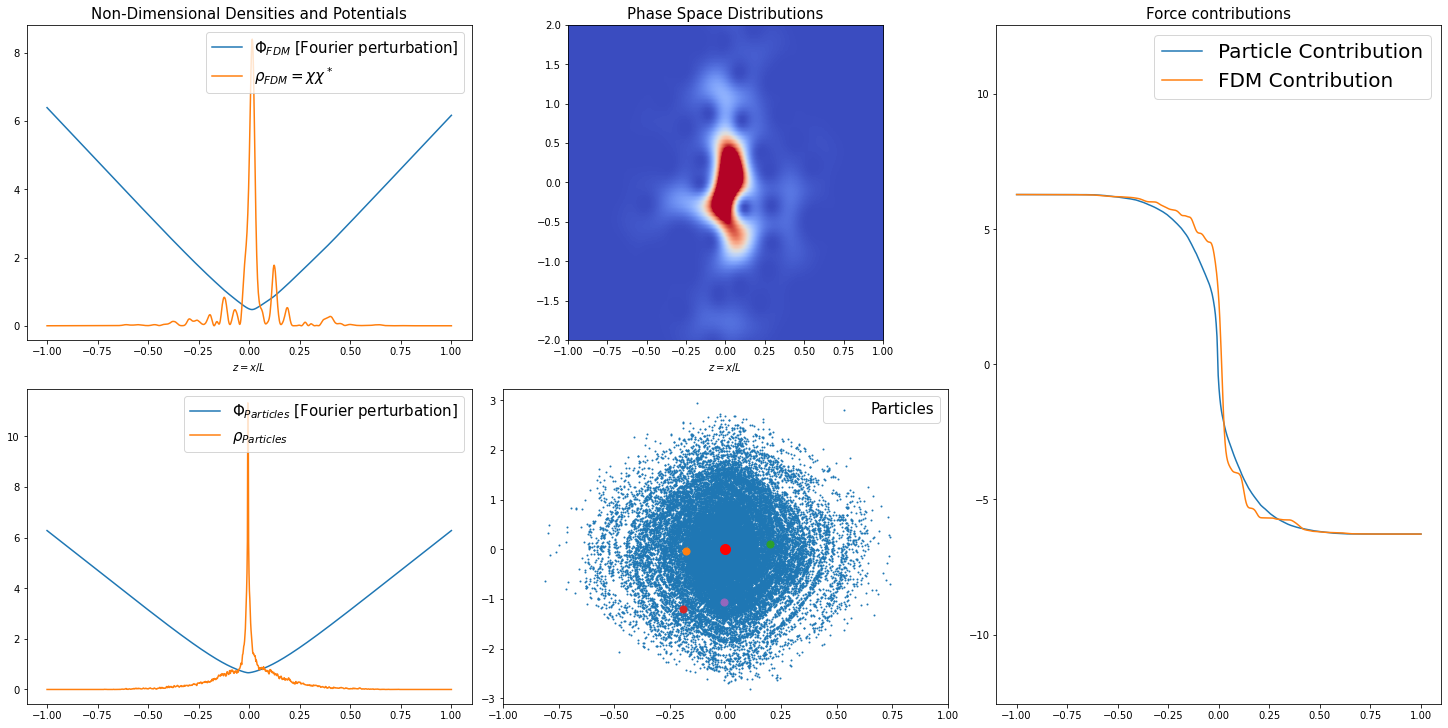

7
sum chi^2 = 4074.7417827520558
500000.0
0.008157641206710637


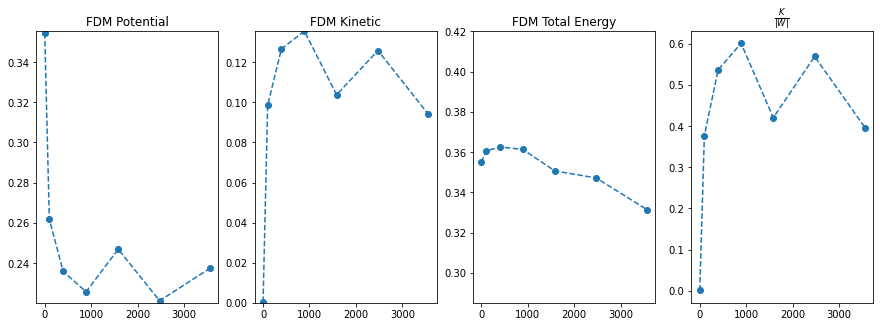

1.0000000000000002


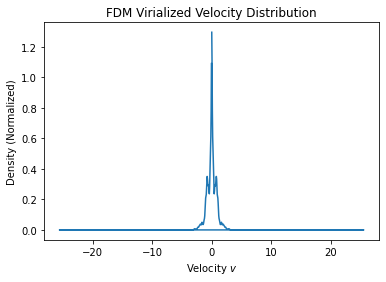

0.017901260166089374


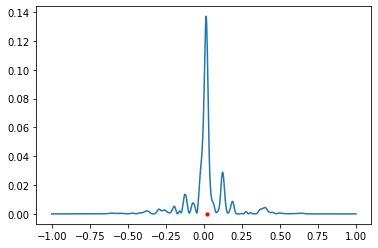

z_rms = 0.0810300115046495
v_rms = 0.10816288670350566
v_rms = 0.7386003658724424
z_rms = 0.16092898268792702
K_avg = 0.5*m*v_rms^2 = 2.727652502334529e-06 (m=1e-05)
=> 2*K_avg = 5.455305004669058e-06
W_avg = 8046.449134396351
---------Now Different Routine---------
K_tot = 0.13638262511672608
K_avg = 2.7276525023345217e-06
W_tot = -0.330419181791896
W_avg = -6.60838363583792e-06


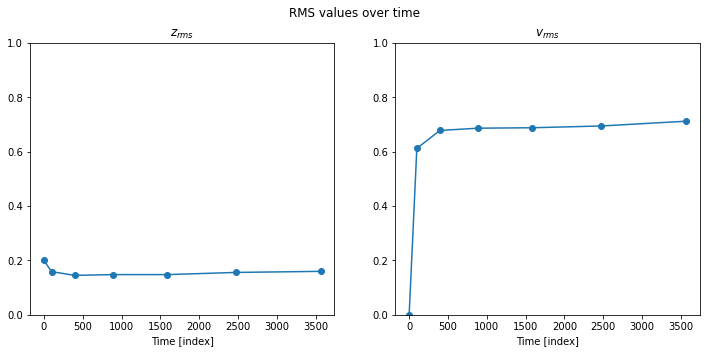

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:108: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


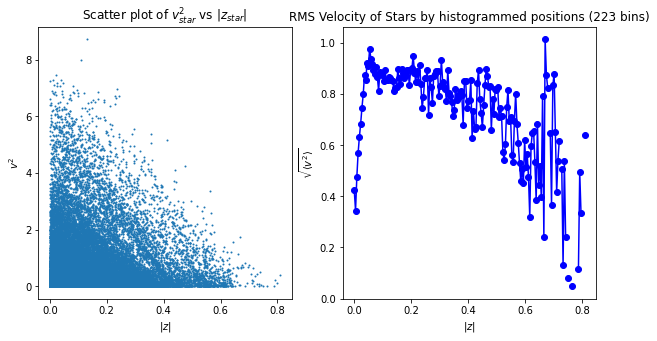

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['False', 0.0, 1e-05, 0.0]


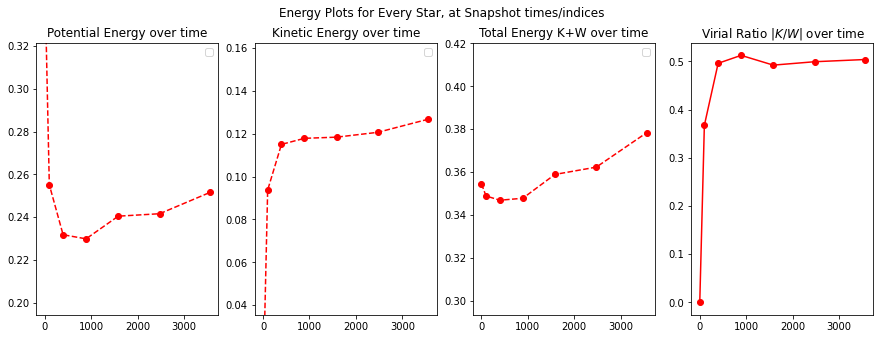

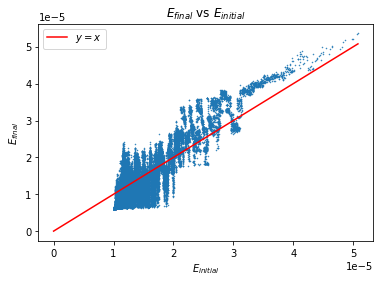

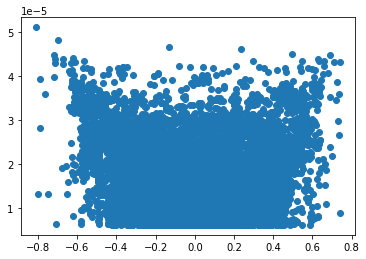

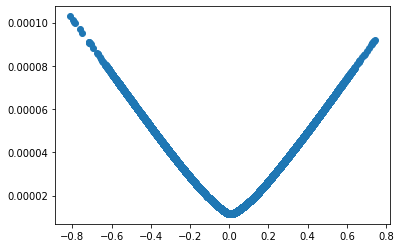

Total Potential: 0.5239189106081199
Total Potential: -0.2619594553040656
223


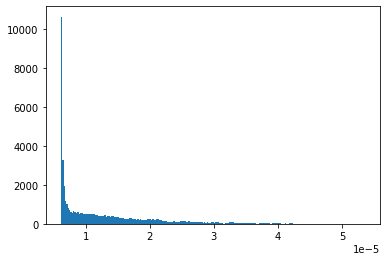

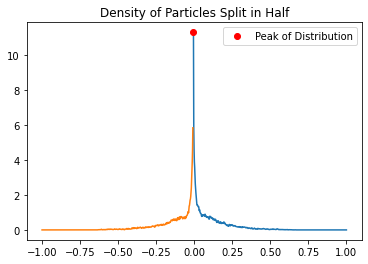

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:324: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_whole),np.log(rho_whole))


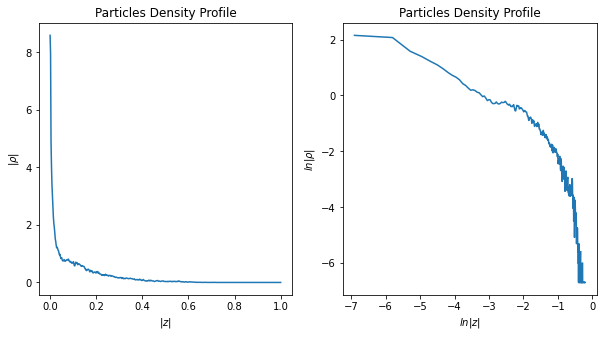

Check
Check
Check
#columns = 3
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


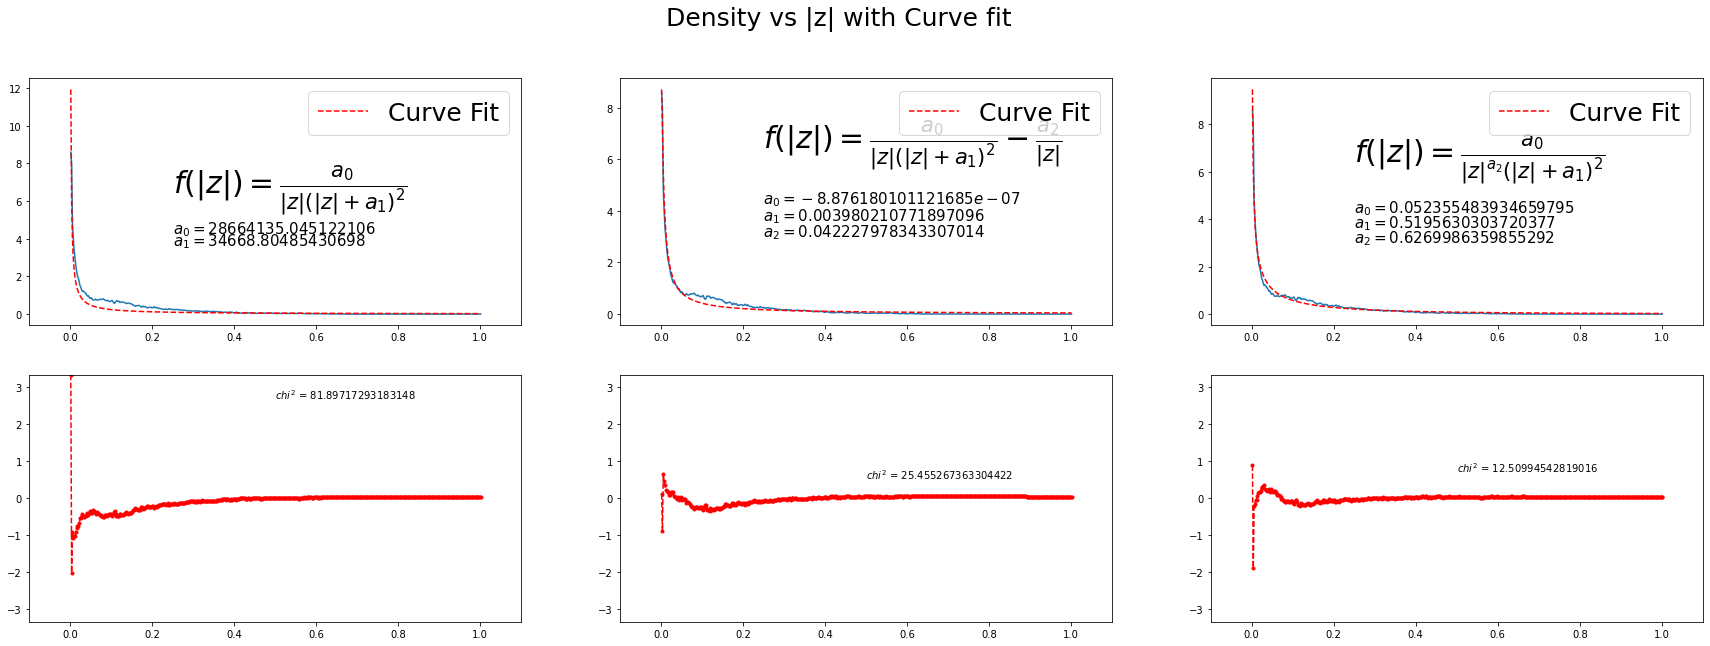

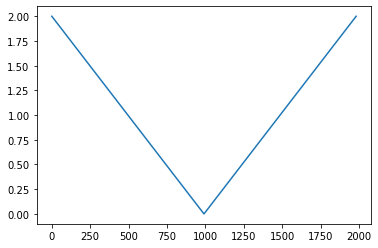

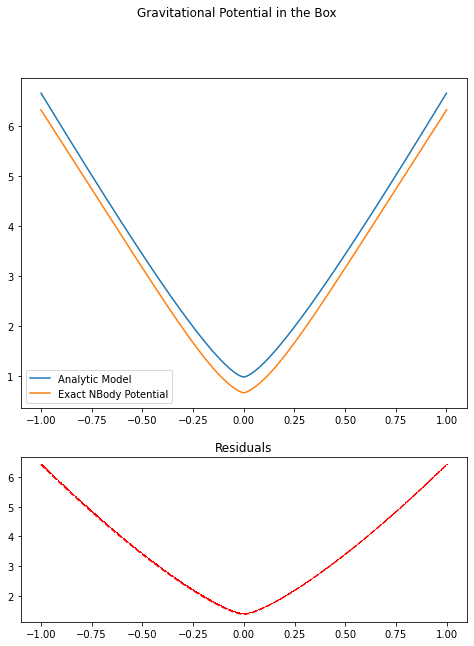

fit params = [0.05235548 0.51956303 0.62699864]


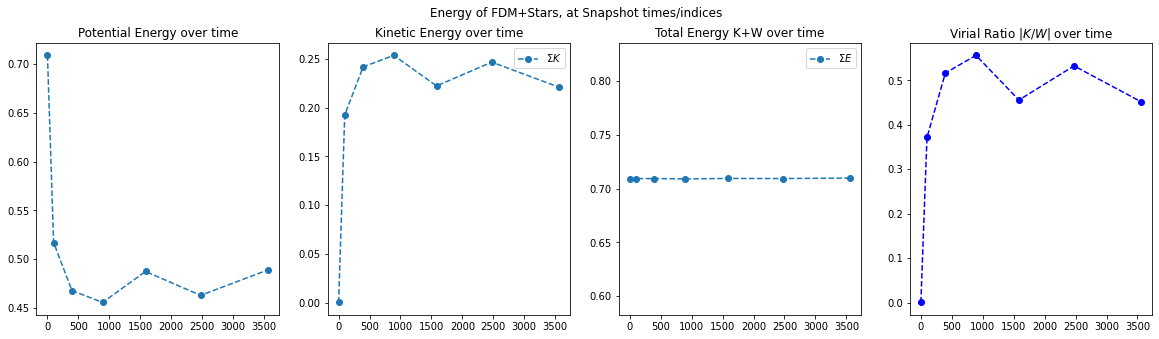

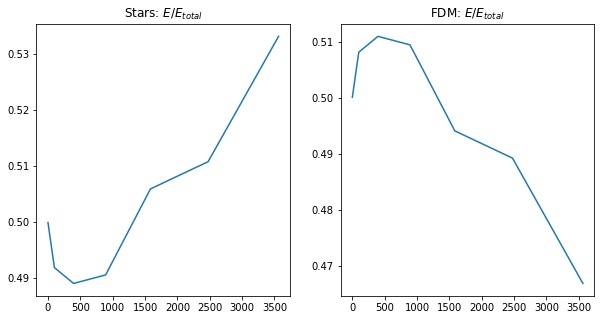

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingIsolated/Full/FDM0.5_r0.008157645763118187_Snapshots


In [2]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingIsolated/Full" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
folders = ["FDM0.5_r0.008157645763118187_Snapshots"]
    # "FDM0.5_r0.004078822881559093_Snapshots",
    #         "FDM0.5_r0.0008157645763118187_Snapshots",
    #         "FDM0.5_r0.0004078822881559093_Snapshots"]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms,v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

#### Equilibrium ICs

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs
--------New Analysis--------
/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/FDM0.5_r0.0003646239746235322_Images
[['Time Elapsed:' '642.3133301734924']
 ['Box Length:' '2.0']
 ['Boson Mass:' '1371.275710864161']
 ['Number of bosons:' '0.0003646239746235322']
 ['Particle mass(es):' '4.663576831051987e-05']
 ['Variable mass:' 'False']
 ['Variable mass fraction' '0']
 ['sigma1' '4.663576831051987e-05']
 ['sigma2' '0']
 ['Number of Particles:' '10000']
 ['FDM Fuzziness:' '0.0003646239746235322']
 ['Grid Points:' '1000']]
r=0.0003646239746235322,Num_stars = 10000.0
3


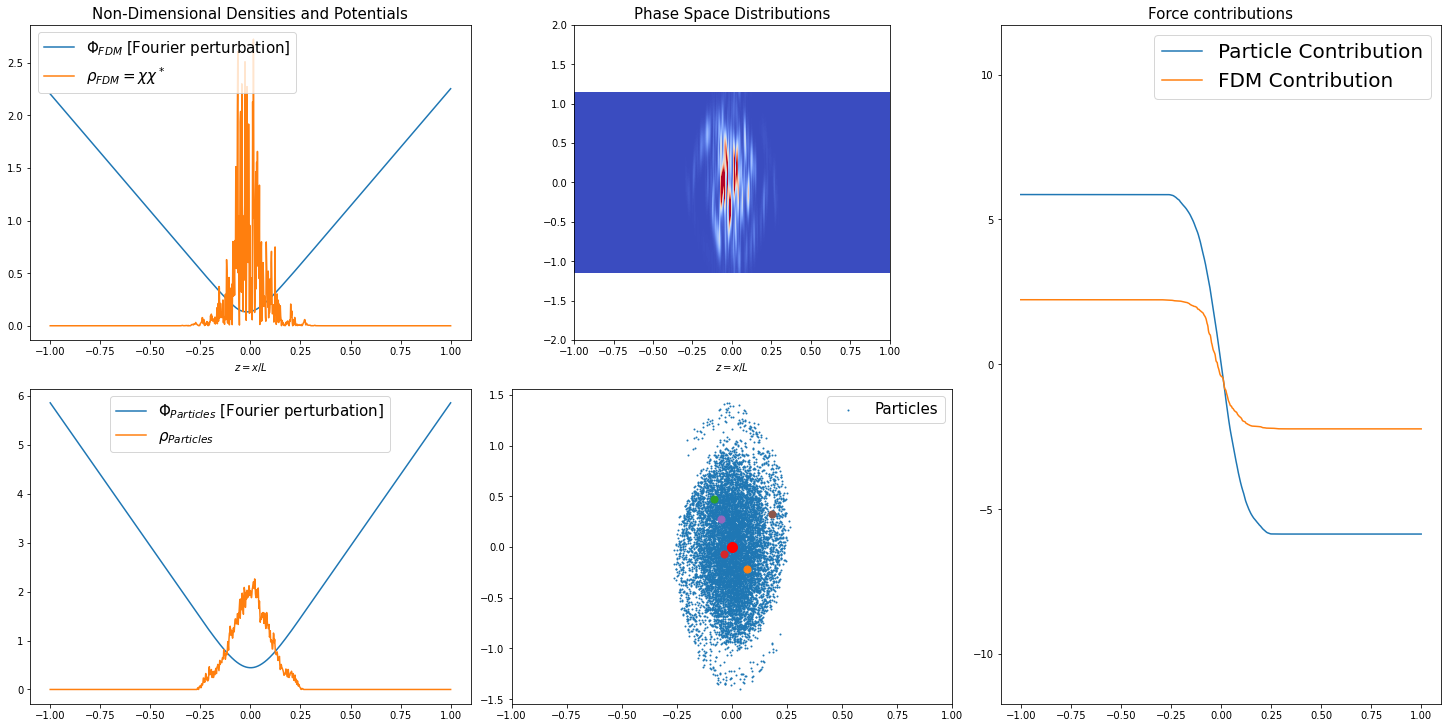

sum chi^2 = 64.63000000736858
500000.0
0.0001293893894041384


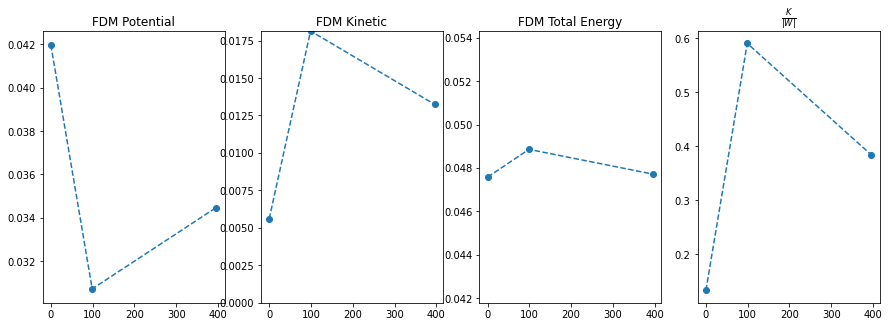

0.9999999999999999


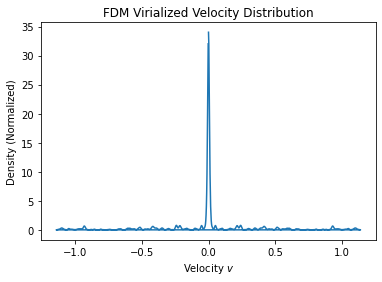

-0.011197390869072548


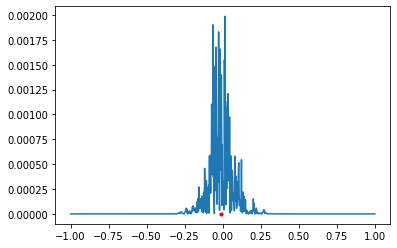

z_rms = 0.06721530247450973
v_rms = 0.24069302327487044
v_rms = 0.4571038436699368
z_rms = 0.09538643518496813
K_avg = 0.5*m*v_rms^2 = 4.872130212395048e-06 (m=4.663576831051987e-05)
=> 2*K_avg = 9.744260424790096e-06
W_avg = 953.8643518496813
---------Now Different Routine---------
K_tot = 0.04872130212395051
K_avg = 4.872130212395051e-06
W_tot = -0.20728201422095396
W_avg = -2.0728201422095395e-05


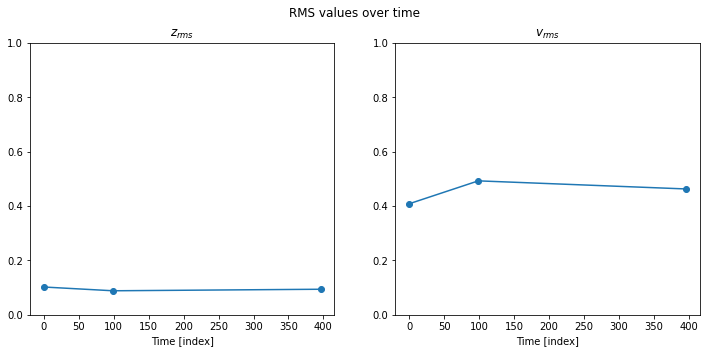

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:108: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


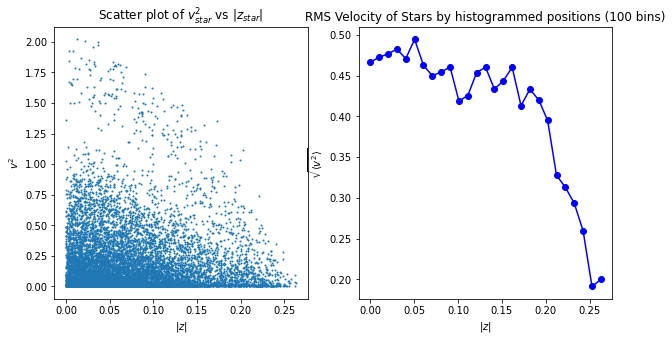

['False', 0.0, 4.663576831051987e-05, 0.0]


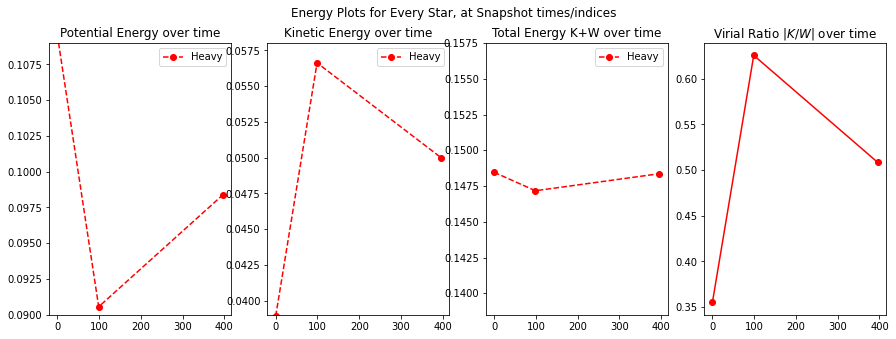

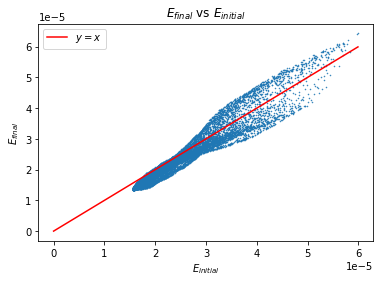

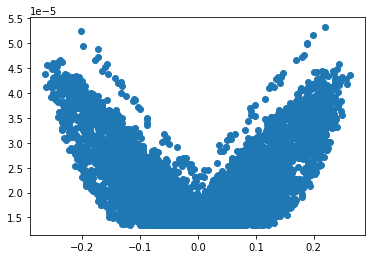

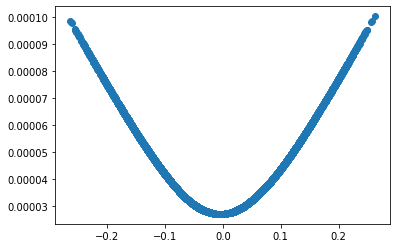

Total Potential: 0.29461405430701654
Total Potential: -0.14730702715351143
100


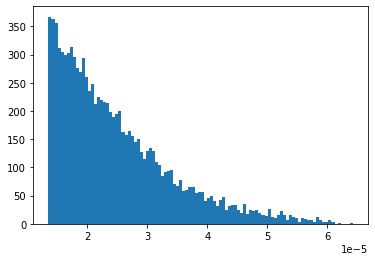

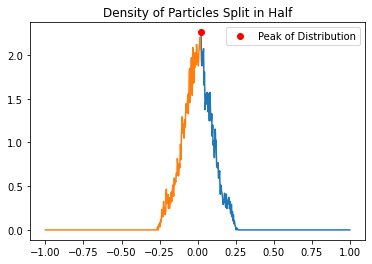

/home/boris/Documents/Research/FDM_n_Bodies/OneD/Analysis/NBody.py:324: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_whole),np.log(rho_whole))


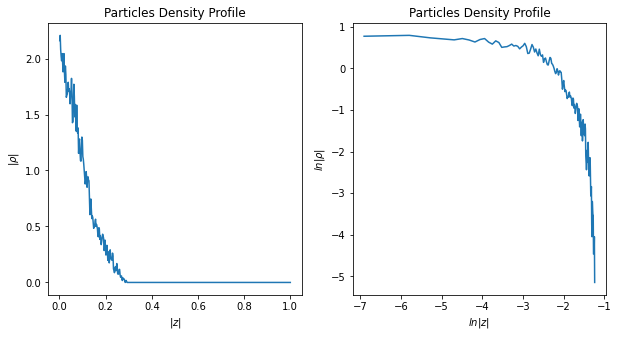

Check
Check
Check
#columns = 3
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


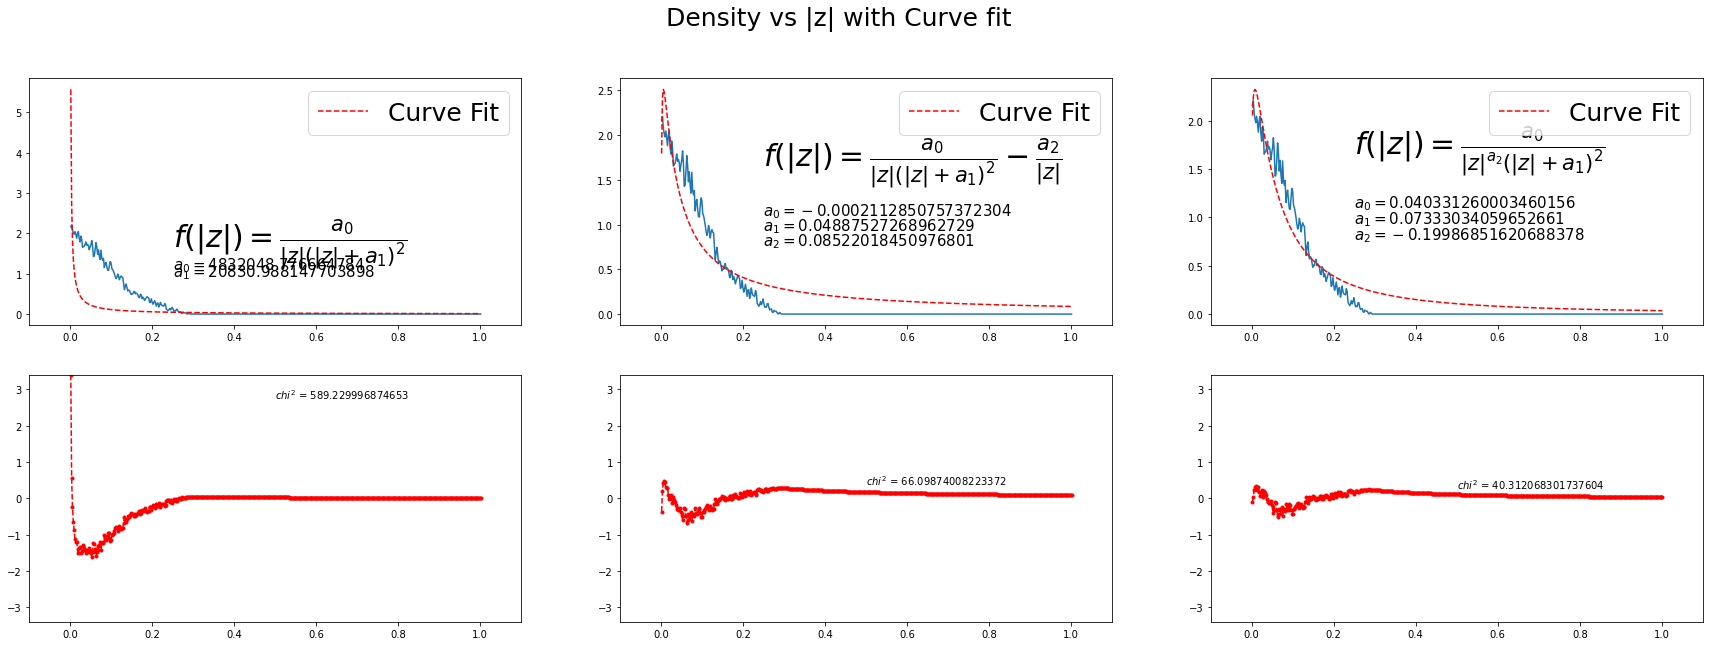

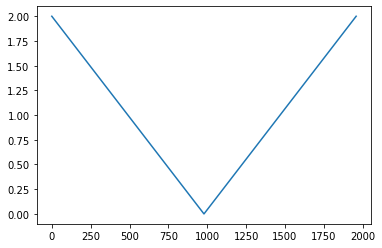

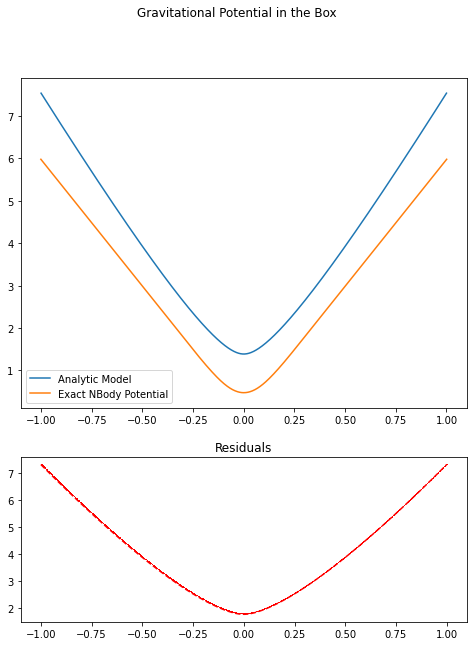

fit params = [ 0.04033126  0.07333034 -0.19986852]


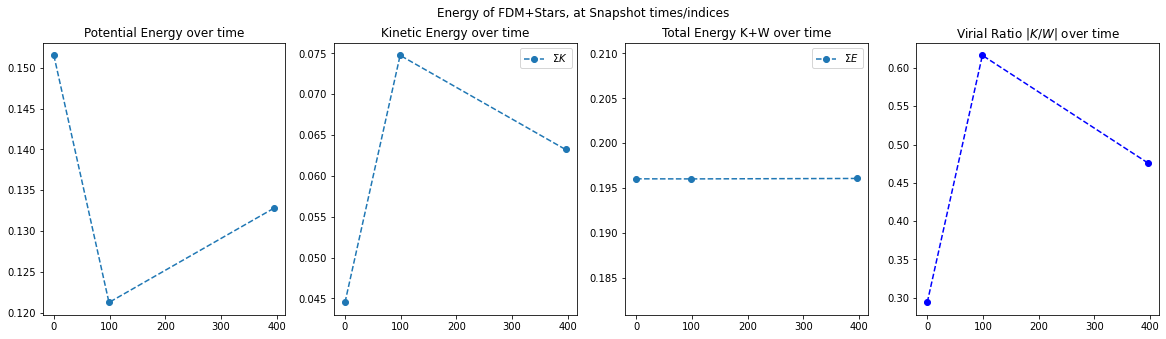

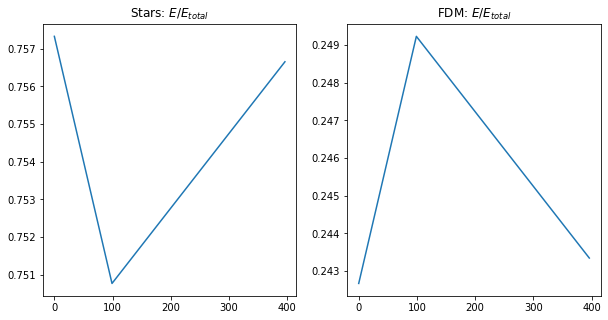

/home/boris/Documents/Research/FDM_n_Bodies/1D_Codes/Programs/Analysis/TestingEquilibriumICs/FDM0.5_r0.0003646239746235322_Images


In [3]:
#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)

import OneD.Analysis.Analysis as Analysis 
import matplotlib.pyplot as plt

os.chdir(default_path)
cwd = os.getcwd()
print(cwd)

where_folder = "TestingEquilibriumICs" #My_Package_PATH + "/Programs/Analysis/TestingFDM"
os.chdir(cwd +"/"+where_folder)
print(os.getcwd())
#folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
folders = ["FDM0.5_r0.0003646239746235322_Images"]
    # "FDM0.5_r0.004078822881559093_Snapshots",
    #         "FDM0.5_r0.0008157645763118187_Snapshots",
    #         "FDM0.5_r0.0004078822881559093_Snapshots"]

r_s = []
FDM_z_rms_s = []
FDM_v_rms_s = []
z_rms_s = []
v_rms_s = []
for folder in folders:
    print("--------New Analysis--------")
    os.chdir(cwd +"/"+where_folder)
    r, Num_stars, FDM_z_rms, FDM_v_rms, z_rms,v_rms, popt = Analysis.analysis(folder,type='Isolated')
    
    r_s.append(r)
    FDM_z_rms_s.append(FDM_z_rms)
    FDM_v_rms_s.append(FDM_v_rms)
    z_rms_s.append(z_rms)
    v_rms_s.append(v_rms)

    print(os.getcwd()) 

# Calculate $v_{rms}$ and $R_{syst}$ 

Want to verify
$$\langle v^2 \rangle = \frac{GM}{R_{syst}}$$

In [ ]:
v_rms = np.sqrt(np.mean([star.v**2 for star in stars]))
z_rms = np.sqrt(np.mean([star.x**2 for star in stars]))
print(f"v_rms = {v_rms}")
print(z_rms)
#v_rms = np.sqrt(np.sum([star.v**2 for star in stars])/Num_stars)

K = 0.5 * v_rms**2
print(f"K_avg = 0.5*m*v_rms^2 = {K} (m=1)")
print(F"=> 2*K_avg = {2*K}")

print(z_rms*Num_stars)

print("-----------------------")




R_syst = Num_stars / v_rms**2
print(R_syst)



rho_0 = np.mean(rho_part)
print(4*rho_0*z_rms)

print(v_rms**2 / (2*np.pi*z_rms))

print(16*np.pi*rho_0**2*z_rms**3 / Num_stars)


In [ ]:
plt.plot(z,phi_part)
plt.plot(z,-Num_stars/np.abs(z))
plt.ylim(5*np.min(phi_part),-np.min(phi_part))

In [ ]:

phi_part = phi_part - (np.max(phi_part)-np.max(-Num_stars/np.abs(z)))

plt.plot(z,phi_part)
plt.plot(z,-Num_stars/np.abs(z))
plt.ylim(5*np.min(phi_part),-np.min(phi_part))
plt.show()

# Compute total KE of stars:
K = 0
for star in stars:
    dK = 0.5*star.v**2
    K += dK
print(K)
#average KE:
print(K/Num_stars)

#Compute Total Potential
W = 0
for star in stars:
    #g = NB.g(star,a_part,dz)
    i = int(star.x//dz)
    rem = star.x % dz 

    if i != len(phi_part)-1:
        value = phi_part[i] + rem*(phi_part[i+1]-phi_part[i])/dz
    elif i == len(phi_part)-1:
        # then i+1 <=> 0
        value = phi_part[i] + rem*(phi_part[0]-phi_part[i])/dz
    
    phi_star = value
    dW = phi_star
    W += dW
print(W)
#average W:
print(W/Num_stars)

In [ ]:
def f(z,*p):
    u_0 = p[0]
    z_0 = p[1]
    return u_0 / np.cosh(0.5*z/z_0)**2

guess = [rho_0,z_0]
popt,pcov = opt.curve_fit(f,z,grid_counts,p0 = guess)
plt.plot(z,grid_counts)
plt.plot(z,f(z,*popt))
plt.show()

guess = [rho_0,z_0]
popt,pcov = opt.curve_fit(f,z,phi_part,p0 = guess)
plt.plot(z,phi_part)
plt.plot(z,f(z,*popt))
plt.show()

def g(z,*p):
    return p[0]*np.exp(-z**2 / p[1])

guess = [-rho_0,z_0]
popt,pcov = opt.curve_fit(g,z,phi_part,p0 = guess)
plt.plot(z,phi_part)
plt.plot(z,g(z,*popt))
plt.show()

